In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv(r"MC1_2018 (1)/2018 Mini-Challenge 1/AllBirdsv4.csv")

In [134]:
df

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123
...,...,...,...,...,...,...,...,...
2076,305166,Vermillion Trillian,call,D,16:00,2/28/2016,86,144
2077,236287,Vermillion Trillian,song,D,17:10,4/12/2015,72,58
2078,236286,Vermillion Trillian,song,D,17:05,4/12/2015,40,103
2079,153963,Vermillion Trillian,call,D,14:35,11/5/2013,148,158


In [4]:
df=df.rename(columns={"File ID": "ID"})

In [5]:
df.isna().sum()

ID                   0
English_name         0
Vocalization_type    0
Quality              0
Time                 0
Date                 0
X                    0
Y                    0
dtype: int64

In [6]:
df.dtypes

ID                    int64
English_name         object
Vocalization_type    object
Quality              object
Time                 object
Date                 object
X                     int64
Y                    object
dtype: object

In [7]:
df['Y']=[int(i[0:2]) for i in df.Y.values]

In [8]:
df.dtypes

ID                    int64
English_name         object
Vocalization_type    object
Quality              object
Time                 object
Date                 object
X                     int64
Y                     int64
dtype: object

In [9]:
df.English_name.unique()

array(['Rose-crested Blue Pipit', 'Blue-collared Zipper', 'Bombadil',
       'Broad-winged Jojo', 'Canadian Cootamum',
       'Carries Champagne Pipit', 'Darkwing Sparrow',
       'Eastern Corn Skeet', 'Green-tipped Scarlet Pipit',
       'Lesser Birchbeere', 'Orange Pine Plover', 'Ordinary Snape',
       'Pinkfinch', 'Purple Tooting Tout', 'Qax', 'Queenscoat',
       'Bent-beak Riffraff', 'Scrawny Jay', 'Vermillion Trillian'],
      dtype=object)

In [10]:
df.Vocalization_type.unique()

array(['call', 'song', 'Song', 'call, song', '?', 'Call', 'Call, song',
       ' call', 'scold', 'drumming', 'bill-snapping'], dtype=object)

In [11]:
df.Vocalization_type.str.lower().unique()

array(['call', 'song', 'call, song', '?', ' call', 'scold', 'drumming',
       'bill-snapping'], dtype=object)

In [12]:
df=df[df['Vocalization_type']!='?'].copy()

In [13]:
df.Vocalization_type.str.lower().unique()

array(['call', 'song', 'call, song', ' call', 'scold', 'drumming',
       'bill-snapping'], dtype=object)

In [14]:
df.Quality.unique()

array(['no score', 'A', 'B', 'C', 'D', 'E'], dtype=object)

In [15]:
df=df[df['Quality']!='no score'].copy()

In [16]:
df.Quality.unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [17]:
df.Time.unique()

array(['7:48', '12:00', '11:00', '6:00', '13:00', '10:00', '7:43',
       '12:47', '12:45', '7:00', '?', '8:29', '15:00', '9:01', '7:19',
       '20:31', '15:34', '11:19', '7:23', '17:00', '7:40', '17:30',
       '15:27', '17:50', '21:18', '21:53', '21:05', '8:00', '11:30',
       '15:20', '13.5', '8:30', '6:35', '5:56', '6:15', 'am', '15:30',
       '5:35', '9:30', '6:12', '8:10', '8:04', '6:45', '6:43', '14:39',
       '7:52', '14:45', '14:18', '8:53', '13:01', '11:41', '11:40',
       '11:39', '7:44', '7:32', '8:59', '9:38', '9:34', '10:35', '12:30',
       '7:30', '10:30', '11:45', '10:29', '7:12', '7:11', '19:00',
       '18:04', '12:39', '13:50', '13:25', '15:37', '8:25', '7:50',
       '11:35', '11:29', '9:28', '9:00', '20:50', '21:16', '6:57',
       '14:00', '13.58', '5:30pm', '9:58', '?:?', '14:30', '5:42pm',
       '10:45', '5:40', '23:30', '6:52', '8:27', '8:20', '9:40', '6:58',
       '10.34am', '8:46', '13.3', '14:59', '20:30', '16:49', '17:05',
       '6:30', '6:40', '6:

In [18]:
df=df[(df['Time']!='early morning')& (df['Time']!='morning')&(df['Time']!='.')&(df['Time']!='??:??')&(df['Time']!='Dawn')&(df['Time']!='?')&(df['Time']!='??')&(df['Time']!='?:?')].copy()

In [19]:
df.Time.unique()

array(['7:48', '12:00', '11:00', '6:00', '13:00', '10:00', '7:43',
       '12:47', '12:45', '7:00', '8:29', '15:00', '9:01', '7:19', '20:31',
       '15:34', '11:19', '7:23', '17:00', '7:40', '17:30', '15:27',
       '17:50', '21:18', '21:53', '21:05', '8:00', '11:30', '15:20',
       '13.5', '8:30', '6:35', '5:56', '6:15', 'am', '15:30', '5:35',
       '9:30', '6:12', '8:10', '8:04', '6:45', '6:43', '14:39', '7:52',
       '14:45', '14:18', '8:53', '13:01', '11:41', '11:40', '11:39',
       '7:44', '7:32', '8:59', '9:38', '9:34', '10:35', '12:30', '7:30',
       '10:30', '11:45', '10:29', '7:12', '7:11', '19:00', '18:04',
       '12:39', '13:50', '13:25', '15:37', '8:25', '7:50', '11:35',
       '11:29', '9:28', '9:00', '20:50', '21:16', '6:57', '14:00',
       '13.58', '5:30pm', '9:58', '14:30', '5:42pm', '10:45', '5:40',
       '23:30', '6:52', '8:27', '8:20', '9:40', '6:58', '10.34am', '8:46',
       '13.3', '14:59', '20:30', '16:49', '17:05', '6:30', '6:40', '6:24',
       '18:30'

In [20]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [21]:
pipit=df[df['English_name']=='Rose-crested Blue Pipit']

In [22]:
pipit.reset_index()

,index,ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,13
1,2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
2,3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,12
3,4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,12
4,5,401720,Rose-crested Blue Pipit,call,A,13:00,12/28/2016,132,12
...,...,...,...,...,...,...,...,...,...
168,180,345551,Rose-crested Blue Pipit,song,D,9:34,2/10/2016,124,11
169,181,325274,Rose-crested Blue Pipit,song,D,20:30,6/23/2016,140,11
170,182,174364,Rose-crested Blue Pipit,song,D,12:00,4/13/2014,130,13
171,184,18970,Rose-crested Blue Pipit,song,D,8:00,12/22/2007,104,12


In [23]:
# x=pipit.loc[pipit.Vocalization_type == 'song']["X"]
# y=pipit.loc[pipit.Vocalization_type == 'song']["Y"]

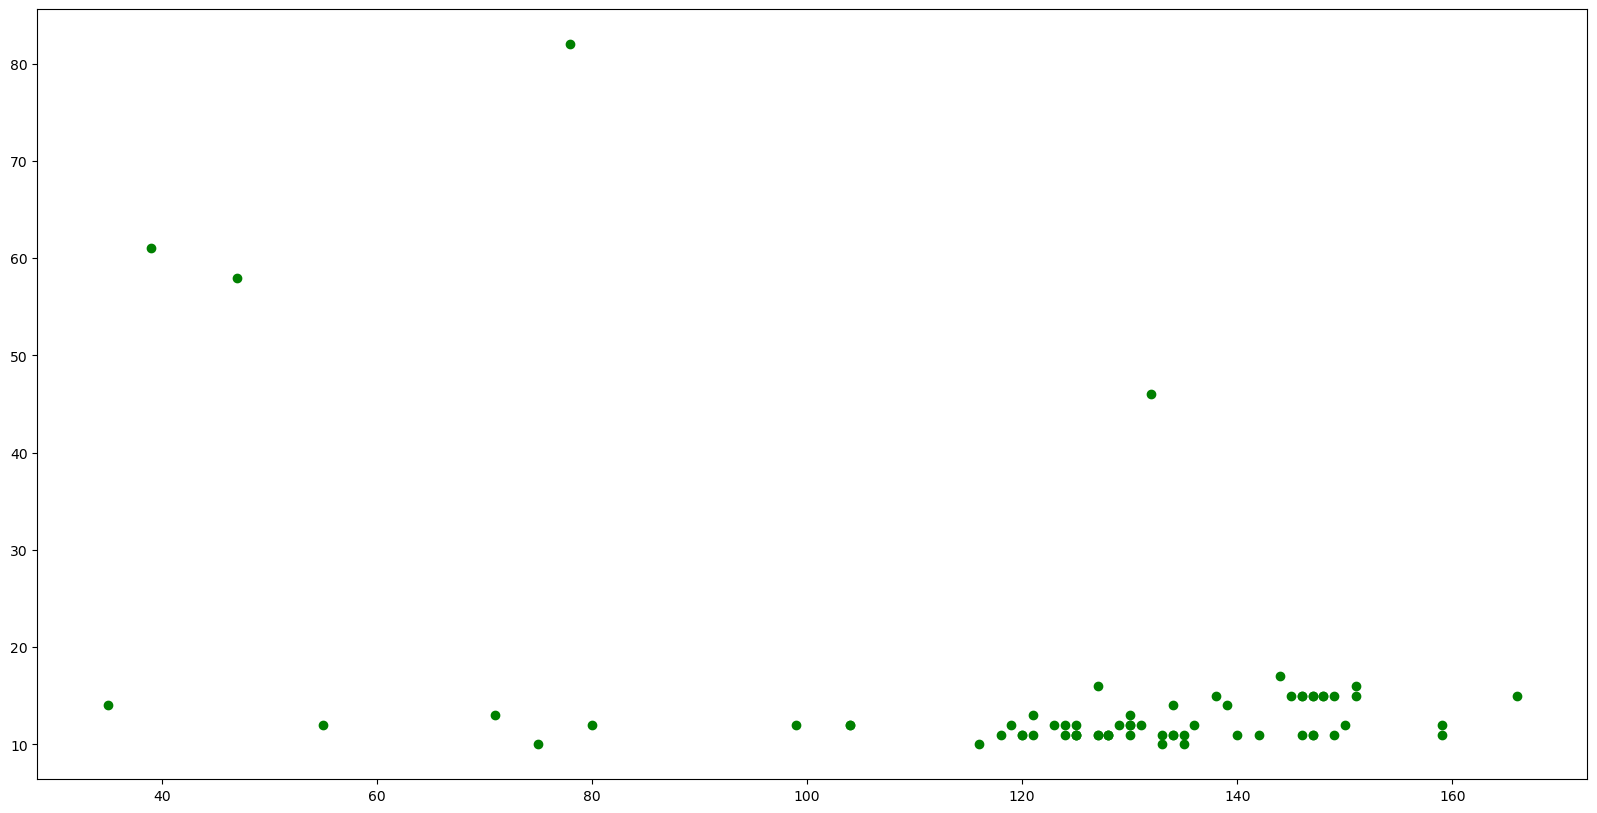

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
# plt.scatter(x,y, color="green", label="Song")
# plt.show()

In [25]:

from os import listdir
from os.path import join
from tqdm import tqdm

import IPython.display as ipd
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim
import librosa.display
import librosa

In [26]:
df['label']=[1 if i== 'Rose-crested Blue Pipit' else 0 for i in df.English_name]

In [27]:
df

,ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,label
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,13,1
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76,1
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,12,1
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,12,1
5,401720,Rose-crested Blue Pipit,call,A,13:00,12/28/2016,132,12,1
...,...,...,...,...,...,...,...,...,...
2075,305167,Vermillion Trillian,call,D,16:30,2/28/2016,56,87,0
2076,305166,Vermillion Trillian,call,D,16:00,2/28/2016,86,14,0
2077,236287,Vermillion Trillian,song,D,17:10,4/12/2015,72,58,0
2078,236286,Vermillion Trillian,song,D,17:05,4/12/2015,40,10,0


In [95]:
loca=r'ALLBIRDScopy/'
Id=[]

    

In [96]:
len(Id)

0

In [97]:
Sr,value,Name,filename =[],[],[],[]
def value_File(Sr,value,Name):
    for x in tqdm(listdir(loca)):
        print(x)
        Id.append(x.split("-")[-1].split(".")[0])
        rate, sr = librosa.load(loca+x)
        value.append(rate)
        Sr.append(sr)
        Name.append(" ".join(x.split('-')[0:-2]))
        filename.append(loca+x)
    return Sr,value,Name
Sr,value,Name =value_File(Sr,value,Name)


  0%|                                          | 2/2110 [00:00<02:49, 12.42it/s]

Queenscoat-315730.wav
Broad-winged-Jojo-164751.wav
Orange-Pine-Plover-287345(1).wav
Bent-Beak-Riffraff-69888.wav


  0%|▏                                        | 10/2110 [00:00<00:48, 43.68it/s]

Rose-Crested-Blue-Pipit-14877.wav
Orange-Pine-Plover-83517.wav
Rose-Crested-Blue-Pipit-353709.wav
Queenscoat-345891.wav
Scrawny-Jay-2631.wav
Queenscoat-202516.wav
Qax-313535.wav
Darkwing-Sparrow-240216.wav
Broad-winged-Jojo-96700.wav
Lesser-Birchbeere-76499.wav
Queenscoat-390909.wav


  1%|▍                                        | 21/2110 [00:00<00:55, 37.89it/s]

Queenscoat-266053.wav
Orange-Pine-Plover-305136.wav
Rose-Crested-Blue-Pipit-345802.wav
Pinkfinch-211063(1).wav
Queenscoat-393743.wav
Darkwing-Sparrow-381853.wav
Rose-Crested-Blue-Pipit-291662.wav
Scrawny-Jay-32402.wav
Green-Tipped-Scarlet-Pipit-46755.wav
Lesser-Birchbeere-138711.wav
Green-Tipped-Scarlet-Pipit-299158.wav


  1%|▌                                        | 27/2110 [00:00<00:47, 43.48it/s]

Green-Tipped-Scarlet-Pipit-206678.wav
Eastern-Corn-Skeet-1375.wav
Lesser-Birchbeere-302409.wav
Lesser-Birchbeere-169204.wav
Orange-Pine-Plover-174398.wav
Rose-Crested-Blue-Pipit-41282.wav


  2%|▌                                        | 32/2110 [00:00<00:57, 36.32it/s]

Broad-winged-Jojo-135668.wav
Orange-Pine-Plover-244585.wav


  2%|▋                                        | 36/2110 [00:01<03:04, 11.25it/s]

Rose-Crested-Blue-Pipit-313073.wav
Rose-Crested-Blue-Pipit-345553.wav
Carries-Champagne-Pipit-91299.wav
Bombadil-296886.wav
Carries-Champagne-Pipit-344100.wav
Bombadil-296892.wav
Green-Tipped-Scarlet-Pipit-18985.wav


  2%|▉                                        | 49/2110 [00:02<01:36, 21.38it/s]

Orange-Pine-Plover-168014.wav
Darkwing-Sparrow-344306.wav
Bombadil-31047.wav
Carries-Champagne-Pipit-357183.wav
Lesser-Birchbeere-197938.wav
Lesser-Birchbeere-377860.wav
Orange-Pine-Plover-327793.wav
Orange-Pine-Plover-312728.wav
Queenscoat-138587.wav


  3%|█                                        | 54/2110 [00:02<01:37, 21.17it/s]

Lesser-Birchbeere-220910.wav
Queenscoat-371659.wav
Green-Tipped-Scarlet-Pipit-210152.wav
Broad-winged-Jojo-196882.wav
Orange-Pine-Plover-327787.wav
Queenscoat-406311.wav
Green-Tipped-Scarlet-Pipit-334189(1).wav


  3%|█▎                                       | 67/2110 [00:02<01:01, 33.33it/s]

Canadian-Cootamum-181303.wav
Rose-Crested-Blue-Pipit-387404.wav
Queenscoat-101851.wav
Eastern-Corn-Skeet-111142.wav
Carries-Champagne-Pipit-395981.wav
Green-Tipped-Scarlet-Pipit-387945.wav
Green-Tipped-Scarlet-Pipit-49062.wav
Orange-Pine-Plover-390273.wav
Purple-Tooting-Tout-362567.wav
Queenscoat-383814.wav
Qax-88865.wav
Purple-Tooting-Tout-362566.wav


  4%|█▍                                       | 77/2110 [00:02<00:56, 35.88it/s]

Blue-collared-Zipper-131815.wav
Green-Tipped-Scarlet-Pipit-49063.wav
Scrawny-Jay-14981.wav
Queenscoat-320629.wav
Broad-winged-Jojo-86466.wav
Carries-Champagne-Pipit-338753.wav
Eastern-Corn-Skeet-191964.wav
Queenscoat-316364.wav
Bombadil-315032.wav
Darkwing-Sparrow-388296.wav
Eastern-Corn-Skeet-111143.wav


  4%|█▌                                       | 82/2110 [00:03<00:54, 37.07it/s]

Rose-Crested-Blue-Pipit-387405.wav
Queenscoat-348224.wav
Canadian-Cootamum-96741.wav
Darkwing-Sparrow-384490.wav
Lesser-Birchbeere-169198.wav
Bombadil-318258.wav
Queenscoat-406310.wav


  4%|█▊                                       | 93/2110 [00:03<01:02, 32.06it/s]

Pinkfinch-297560.wav
Queenscoat-138586.wav
Orange-Pine-Plover-312729.wav
Pinkfinch-211063.wav
Lesser-Birchbeere-220905.wav
Darkwing-Sparrow-264941.wav
Canadian-Cootamum-370196.wav
Scrawny-Jay-337874.wav
Carries-Champagne-Pipit-337676.wav
Lesser-Birchbeere-377861.wav


  5%|█▉                                      | 103/2110 [00:03<00:53, 37.64it/s]

Scrawny-Jay-24498.wav
Bombadil-137968.wav
Bombadil-31046.wav
Lesser-Birchbeere-312747.wav
Ordinary-Snape-193146.wav
Purple-Tooting-Tout-78416.wav
Orange-Pine-Plover-287295.wav
Bombadil-296887.wav
Bent-Beak-Riffraff-102830.wav
Purple-Tooting-Tout-157798.wav


  5%|██▏                                     | 113/2110 [00:03<00:55, 35.69it/s]

Carries-Champagne-Pipit-91298.wav
Rose-Crested-Blue-Pipit-345552.wav
Broad-winged-Jojo-135669.wav
Rose-Crested-Blue-Pipit-41283.wav
Green-Tipped-Scarlet-Pipit-174492.wav
Lesser-Birchbeere-169205.wav
Bombadil-314099.wav
Orange-Pine-Plover-170060.wav


  6%|██▎                                     | 122/2110 [00:04<00:41, 47.70it/s]

Queenscoat-389929.wav
Queenscoat-376043.wav
Qax-314703.wav
Darkwing-Sparrow-237289.wav
Queenscoat-29603.wav
Vermillion-Trillian-327481.wav
Carries-Champagne-Pipit-390542.wav
Queenscoat-367827.wav
Scrawny-Jay-32403.wav
Scrawny-Jay-8123.wav
Eastern-Corn-Skeet-323217.wav
Ordinary-Snape-302963.wav
Carries-Champagne-Pipit-336144.wav


  6%|██▌                                     | 134/2110 [00:04<00:40, 48.49it/s]

Lesser-Birchbeere-95717.wav
Queenscoat-390908.wav
Carries-Champagne-Pipit-367479.wav
Vermillion-Trillian-337447.wav
Orange-Pine-Plover-135702.wav
Scrawny-Jay-51417.wav
Orange-Pine-Plover-163236.wav
Queenscoat-175914.wav


  7%|██▋                                     | 140/2110 [00:04<01:03, 31.05it/s]

Rose-Crested-Blue-Pipit-106772.wav
Eastern-Corn-Skeet-321819.wav
Queenscoat-345890.wav
Scrawny-Jay-2630.wav
Eastern-Corn-Skeet-378993.wav


  7%|██▋                                     | 145/2110 [00:04<01:11, 27.60it/s]

Queenscoat-26068.wav
Broad-winged-Jojo-164744.wav
Orange-Pine-Plover-138583.wav
Queenscoat-142809.wav
Queenscoat-393232.wav
Queenscoat-308010.wav


  7%|██▉                                     | 155/2110 [00:05<01:00, 32.10it/s]

Scrawny-Jay-108035.wav
Bent-Beak-Riffraff-123208.wav
Qax-144401.wav
Vermillion-Trillian-389354.wav
Orange-Pine-Plover-236500.wav
Eastern-Corn-Skeet-14858.wav
Queenscoat-202515.wav
Bent-Beak-Riffraff-401504.wav
Lesser-Birchbeere-160790.wav


  8%|███                                     | 159/2110 [00:05<01:02, 31.08it/s]

Ordinary-Snape-160345.wav
Rose-Crested-Blue-Pipit-191418.wav
Rose-Crested-Blue-Pipit-312965.wav
Darkwing-Sparrow-240215.wav
Scrawny-Jay-173444.wav
Darkwing-Sparrow-383538.wav
Queenscoat-286198.wav


  8%|███                                     | 163/2110 [00:05<01:24, 23.17it/s]

Vermillion-Trillian-324405.wav
Canadian-Cootamum-306348.wav


  8%|███▏                                    | 169/2110 [00:06<01:40, 19.41it/s]

Orange-Pine-Plover-76984.wav
Rose-Crested-Blue-Pipit-345801.wav
Lesser-Birchbeere-160035.wav
Bent-Beak-Riffraff-88452.wav
Lesser-Birchbeere-220909(1).wav
Darkwing-Sparrow-376566.wav


  9%|███▍                                    | 180/2110 [00:06<01:02, 30.87it/s]

Purple-Tooting-Tout-68773.wav
Purple-Tooting-Tout-175315.wav
Bombadil-278828.wav
Scrawny-Jay-32401.wav
Orange-Pine-Plover-363065.wav
Broad-winged-Jojo-182957.wav
Rose-Crested-Blue-Pipit-182666.wav
Carries-Champagne-Pipit-61960.wav
Eastern-Corn-Skeet-149935.wav
Darkwing-Sparrow-213467.wav
Eastern-Corn-Skeet-1376.wav
Rose-Crested-Blue-Pipit-345550.wav


  9%|███▌                                    | 185/2110 [00:06<00:58, 32.82it/s]

Blue-collared-Zipper-112599.wav
Lesser-Birchbeere-293298.wav
Lesser-Birchbeere-105256.wav
Carries-Champagne-Pipit-166440.wav
Carries-Champagne-Pipit-397429.wav
Bombadil-296885.wav
Blue-collared-Zipper-167890.wav


  9%|███▋                                    | 194/2110 [00:06<01:05, 29.07it/s]

Purple-Tooting-Tout-116705.wav
Bombadil-31044.wav
Broad-winged-Jojo-101243.wav
Lesser-Birchbeere-406225.wav
Lesser-Birchbeere-220907.wav
Scrawny-Jay-45058.wav


  9%|███▊                                    | 198/2110 [00:06<01:14, 25.71it/s]

Queenscoat-307257.wav
Canadian-Cootamum-96743.wav
Blue-collared-Zipper-166768.wav
Queenscoat-406312.wav


 10%|███▉                                    | 206/2110 [00:07<01:05, 28.92it/s]

Orange-Pine-Plover-269616.wav
Carries-Champagne-Pipit-149851.wav
Orange-Pine-Plover-186455.wav
Canadian-Cootamum-325432.wav
Eastern-Corn-Skeet-111141.wav
Vermillion-Trillian-376223.wav
Queenscoat-311384.wav
Bent-Beak-Riffraff-198529.wav


 10%|████                                    | 215/2110 [00:07<00:53, 35.17it/s]

Purple-Tooting-Tout-362570.wav
Bombadil-313482.wav
Queenscoat-190178.wav
Qax-60317.wav
Vermillion-Trillian-16928.wav
Purple-Tooting-Tout-362564.wav
Queenscoat-377028.wav
Pinkfinch-57935.wav
Queenscoat-189400.wav
Broad-winged-Jojo-102207.wav
Bombadil-153037.wav


 10%|████▏                                   | 219/2110 [00:07<01:24, 22.34it/s]

Rose-Crested-Blue-Pipit-150457.wav
Orange-Pine-Plover-77286.wav
Darkwing-Sparrow-388295.wav
Blue-collared-Zipper-341352.wav
Canadian-Cootamum-96742.wav


 11%|████▎                                   | 229/2110 [00:08<01:11, 26.27it/s]

Scrawny-Jay-364750.wav
Queenscoat-307256.wav
Lesser-Birchbeere-399993.wav
Bent-Beak-Riffraff-13505.wav
Orange-Pine-Plover-391437.wav
Blue-collared-Zipper-162080.wav
Purple-Tooting-Tout-116704.wav


 11%|████▍                                   | 233/2110 [00:08<01:28, 21.30it/s]

Pinkfinch-160609.wav
Queenscoat-312317.wav
Green-Tipped-Scarlet-Pipit-75570.wav
Bombadil-296884.wav
Purple-Tooting-Tout-78415.wav
Carries-Champagne-Pipit-344102.wav
Orange-Pine-Plover-244587.wav


 12%|████▋                                   | 245/2110 [00:08<01:18, 23.74it/s]

Queenscoat-27017.wav
Lesser-Birchbeere-16958.wav
Rose-Crested-Blue-Pipit-345551.wav
Ordinary-Snape-65819.wav
Rose-Crested-Blue-Pipit-278001.wav
Pinkfinch-387638.wav
Rose-Crested-Blue-Pipit-324018.wav
Orange-Pine-Plover-164758.wav
Scrawny-Jay-32400.wav
Green-Tipped-Scarlet-Pipit-142719.wav
Bent-Beak-Riffraff-171003.wav
Ordinary-Snape-357949.wav
Bombadil-83740.wav


 12%|████▊                                   | 254/2110 [00:08<00:56, 33.08it/s]

Ordinary-Snape-302960.wav
Purple-Tooting-Tout-35449.wav
Eastern-Corn-Skeet-150242.wav
Ordinary-Snape-354703.wav
Bombadil-314298.wav
Scrawny-Jay-195856.wav
Ordinary-Snape-129778.wav
Orange-Pine-Plover-163235.wav


 13%|█████                                   | 264/2110 [00:09<01:05, 28.09it/s]

Eastern-Corn-Skeet-124070.wav
Lesser-Birchbeere-371803.wav
Broad-winged-Jojo-54331.wav
Queenscoat-202514.wav
Bent-Beak-Riffraff-401505.wav
Bombadil-313534.wav
Blue-collared-Zipper-61917.wav


 13%|█████                                   | 268/2110 [00:09<01:14, 24.75it/s]

Vermillion-Trillian-389355.wav
Green-Tipped-Scarlet-Pipit-154345.wav
Orange-Pine-Plover-58467.wav


 13%|█████▏                                  | 272/2110 [00:09<01:19, 23.23it/s]

Queenscoat-253987.wav
Pinkfinch-312800.wav
Darkwing-Sparrow-192305.wav
Rose-Crested-Blue-Pipit-91847.wav
Vermillion-Trillian-89162.wav
Vermillion-Trillian-217747.wav
Canadian-Cootamum-311816.wav


 13%|█████▎                                  | 282/2110 [00:10<01:05, 27.90it/s]

Orange-Pine-Plover-299480.wav
Green-Tipped-Scarlet-Pipit-50496.wav
Pinkfinch-137669(1).wav
Green-Tipped-Scarlet-Pipit-393881.wav
Vermillion-Trillian-144364.wav
Canadian-Cootamum-305888.wav
Bombadil-179962.wav
Ordinary-Snape-322861.wav
Lesser-Birchbeere-161306.wav


 14%|█████▌                                  | 294/2110 [00:10<01:18, 23.28it/s]

Canadian-Cootamum-93789.wav
Queenscoat-376508.wav
Scrawny-Jay-51404.wav
Carries-Champagne-Pipit-24785.wav
Bent-Beak-Riffraff-84084.wav
Broad-winged-Jojo-253355.wav
Blue-collared-Zipper-251569.wav
Queenscoat-201555.wav
Rose-Crested-Blue-Pipit-354538.wav
Pinkfinch-51763.wav
Lesser-Birchbeere-103965.wav
Lesser-Birchbeere-169202.wav
Canadian-Cootamum-358027.wav
Carries-Champagne-Pipit-91300.wav
Green-Tipped-Scarlet-Pipit-299610.wav


 14%|█████▋                                  | 302/2110 [00:11<01:05, 27.55it/s]

Carries-Champagne-Pipit-61959.wav
Bent-Beak-Riffraff-221677.wav
Rose-Crested-Blue-Pipit-182663.wav


 15%|█████▊                                  | 306/2110 [00:11<01:12, 25.02it/s]

Pinkfinch-175237(1).wav
Canadian-Cootamum-51755.wav
Carries-Champagne-Pipit-380150.wav
Ordinary-Snape-313909.wav
Rose-Crested-Blue-Pipit-345555.wav
Queenscoat-359886.wav
Darkwing-Sparrow-344328.wav


 15%|██████                                  | 317/2110 [00:11<00:51, 34.89it/s]

Lesser-Birchbeere-154791.wav
Orange-Pine-Plover-31002.wav
Green-Tipped-Scarlet-Pipit-11743.wav
Scrawny-Jay-13555.wav
Orange-Pine-Plover-168006.wav
Green-Tipped-Scarlet-Pipit-115916.wav
Orange-Pine-Plover-168012.wav
Carries-Champagne-Pipit-209947.wav
Rose-Crested-Blue-Pipit-171853.wav
Bombadil-31041.wav
Vermillion-Trillian-153963.wav
Queenscoat-307252.wav
Scrawny-Jay-10289.wav
Orange-Pine-Plover-16873.wav
Bombadil-356871.wav
Vermillion-Trillian-180252.wav


 16%|██████▎                                 | 333/2110 [00:11<00:38, 45.66it/s]

Orange-Pine-Plover-390275.wav
Carries-Champagne-Pipit-90340.wav
Queenscoat-267571.wav
Carries-Champagne-Pipit-338754.wav
Blue-collared-Zipper-15843.wav
Bent-Beak-Riffraff-194470.wav
Queenscoat-267570.wav
Rose-Crested-Blue-Pipit-345795.wav
Orange-Pine-Plover-390274.wav
Bombadil-13791.wav
Orange-Pine-Plover-333285.wav


 16%|██████▌                                 | 345/2110 [00:11<00:37, 47.14it/s]

Orange-Pine-Plover-16872.wav
Pinkfinch-47289.wav
Pinkfinch-189290.wav
Queenscoat-343363.wav
Rose-Crested-Blue-Pipit-387403.wav
Ordinary-Snape-31120.wav
Orange-Pine-Plover-168013.wav
Qax-210359.wav
Bent-Beak-Riffraff-188528.wav
Lesser-Birchbeere-316533.wav
Orange-Pine-Plover-168007.wav


 17%|██████▊                                 | 358/2110 [00:12<00:35, 49.88it/s]

Scrawny-Jay-14575.wav
Orange-Pine-Plover-31003.wav
Queenscoat-202883.wav
Rose-Crested-Blue-Pipit-345554.wav
Lesser-Birchbeere-110105.wav
Rose-Crested-Blue-Pipit-320496.wav
Carries-Champagne-Pipit-397439.wav
Canadian-Cootamum-51754.wav
Bent-Beak-Riffraff-202124.wav
Bent-Beak-Riffraff-106265.wav
Rose-Crested-Blue-Pipit-11505.wav
Bombadil-153344.wav


 17%|██████▉                                 | 369/2110 [00:12<00:35, 48.51it/s]

Ordinary-Snape-65820.wav
Queenscoat-235140.wav
Ordinary-Snape-142484.wav
Carries-Champagne-Pipit-91301.wav
Canadian-Cootamum-358026.wav
Lesser-Birchbeere-169203.wav
Queenscoat-201554.wav
Blue-collared-Zipper-251568.wav
Blue-collared-Zipper-339830.wav
Orange-Pine-Plover-233656.wav
Scrawny-Jay-51405.wav
Orange-Pine-Plover-29512.wav
Green-Tipped-Scarlet-Pipit-36909.wav
Queenscoat-278524.wav


 18%|███████▏                                | 379/2110 [00:12<00:29, 59.25it/s]

Green-Tipped-Scarlet-Pipit-81027.wav
Orange-Pine-Plover-308401.wav
Orange-Pine-Plover-388598.wav
Broad-winged-Jojo-164742.wav
Carries-Champagne-Pipit-142690.wav
Purple-Tooting-Tout-317048.wav
Scrawny-Jay-2622.wav
Lesser-Birchbeere-160794.wav
Green-Tipped-Scarlet-Pipit-145503.wav
Purple-Tooting-Tout-163003.wav
Rose-Crested-Blue-Pipit-377874.wav


 18%|███████▎                                | 386/2110 [00:12<00:32, 52.30it/s]

Green-Tipped-Scarlet-Pipit-115450.wav
Darkwing-Sparrow-192306.wav
Purple-Tooting-Tout-314557.wav
Rose-Crested-Blue-Pipit-162569.wav
Green-Tipped-Scarlet-Pipit-50495.wav
Green-Tipped-Scarlet-Pipit-319588.wav


 19%|███████▌                                | 400/2110 [00:13<00:34, 49.95it/s]

Ordinary-Snape-17046.wav
Orange-Pine-Plover-308403.wav
Ordinary-Snape-160431.wav
Orange-Pine-Plover-29510.wav
Bombadil-179961.wav
Ordinary-Snape-322862.wav
Bombadil-100087.wav
Rose-Crested-Blue-Pipit-342417.wav
Eastern-Corn-Skeet-388696.wav
Rose-Crested-Blue-Pipit-402254.wav
Orange-Pine-Plover-373258.wav
Carries-Champagne-Pipit-91303.wav
Lesser-Birchbeere-103966.wav
Lesser-Birchbeere-169201.wav
Orange-Pine-Plover-297109.wav


 20%|███████▊                                | 412/2110 [00:13<00:34, 48.70it/s]

Darkwing-Sparrow-325716.wav
Bombadil-296883.wav
Canadian-Cootamum-363105.wav
Lesser-Birchbeere-364150(1).wav
Orange-Pine-Plover-383949.wav
Darkwing-Sparrow-349814.wav
Rose-Crested-Blue-Pipit-345556.wav
Carries-Champagne-Pipit-175348.wav
Purple-Tooting-Tout-404127.wav
Green-Tipped-Scarlet-Pipit-196407.wav


 20%|███████▉                                | 418/2110 [00:13<00:33, 50.65it/s]

Rose-Crested-Blue-Pipit-364567.wav
Bombadil-31042.wav
Scrawny-Jay-290417.wav
Orange-Pine-Plover-168011.wav
Purple-Tooting-Tout-116703.wav
Darkwing-Sparrow-281739.wav
Queenscoat-369991.wav
Vermillion-Trillian-167838.wav


 20%|████████▏                               | 429/2110 [00:14<01:06, 25.25it/s]

Scrawny-Jay-13556.wav
Canadian-Cootamum-309337.wav
Queenscoat-197349.wav
Carries-Champagne-Pipit-65137.wav
Queenscoat-343361.wav
Canadian-Cootamum-45509.wav
Eastern-Corn-Skeet-184376.wav
Bent-Beak-Riffraff-258764.wav
Orange-Pine-Plover-167849.wav


 21%|████████▏                               | 433/2110 [00:14<01:05, 25.49it/s]

Canadian-Cootamum-96745.wav
Broad-winged-Jojo-140782.wav


 21%|████████▎                               | 440/2110 [00:14<01:14, 22.37it/s]

Rose-Crested-Blue-Pipit-288915.wav
Orange-Pine-Plover-16870.wav
Scrawny-Jay-394329.wav
Eastern-Corn-Skeet-178126.wav
Green-Tipped-Scarlet-Pipit-290233.wav
Orange-Pine-Plover-313625.wav
Ordinary-Snape-212619.wav


 21%|████████▍                               | 443/2110 [00:14<01:12, 22.90it/s]

Rose-Crested-Blue-Pipit-345797.wav
Queenscoat-267572.wav


 21%|████████▌                               | 449/2110 [00:15<01:20, 20.58it/s]

Eastern-Corn-Skeet-375493.wav
Lesser-Birchbeere-183593.wav
Bombadil-13792.wav
Blue-collared-Zipper-274462.wav
Rose-Crested-Blue-Pipit-345796.wav
Qax-364815.wav


 21%|████████▌                               | 453/2110 [00:15<01:07, 24.49it/s]

Bent-Beak-Riffraff-112603.wav
Green-Tipped-Scarlet-Pipit-388441.wav
Lesser-Birchbeere-173884.wav
Purple-Tooting-Tout-362563.wav
Orange-Pine-Plover-16871.wav
Canadian-Cootamum-96744.wav


 22%|████████▋                               | 459/2110 [00:15<01:13, 22.38it/s]

Bent-Beak-Riffraff-258765.wav
Bombadil-132418.wav
Broad-winged-Jojo-140783.wav
Green-Tipped-Scarlet-Pipit-403198.wav
Broad-winged-Jojo-160321.wav
Bombadil-48027.wav
Eastern-Corn-Skeet-184377.wav
Scrawny-Jay-143351.wav


 22%|████████▊                               | 465/2110 [00:15<00:54, 30.06it/s]

Canadian-Cootamum-45508.wav
Carries-Champagne-Pipit-380344.wav
Orange-Pine-Plover-97374.wav
Ordinary-Snape-184629.wav
Canadian-Cootamum-325435.wav


 22%|████████▉                               | 472/2110 [00:16<02:05, 13.03it/s]

Darkwing-Sparrow-281738.wav
Orange-Pine-Plover-304166.wav
Purple-Tooting-Tout-116702.wav
Queenscoat-197348.wav
Scrawny-Jay-13557.wav


 23%|█████████                               | 476/2110 [00:16<01:43, 15.78it/s]

Darkwing-Sparrow-344302.wav
Orange-Pine-Plover-168010.wav
Rose-Crested-Blue-Pipit-325274.wav
Queenscoat-182779.wav
Broad-winged-Jojo-385856.wav
Orange-Pine-Plover-316238.wav
Green-Tipped-Scarlet-Pipit-388119.wav
Rose-Crested-Blue-Pipit-345557.wav


 23%|█████████▏                              | 483/2110 [00:16<01:08, 23.63it/s]

Rose-Crested-Blue-Pipit-232913.wav
Queenscoat-19699.wav
Bombadil-296896.wav
Darkwing-Sparrow-349815.wav
Rose-Crested-Blue-Pipit-293918.wav


 23%|█████████▎                              | 491/2110 [00:17<01:06, 24.47it/s]

Rose-Crested-Blue-Pipit-11506.wav
Bombadil-101415.wav
Darkwing-Sparrow-356114.wav
Broad-winged-Jojo-379541.wav
Lesser-Birchbeere-169200.wav
Orange-Pine-Plover-145941(1).wav
Rose-Crested-Blue-Pipit-113144.wav
Queenscoat-357922.wav
Eastern-Corn-Skeet-161099.wav


 24%|█████████▌                              | 502/2110 [00:17<00:49, 32.16it/s]

Rose-Crested-Blue-Pipit-362922.wav
Rose-Crested-Blue-Pipit-305761.wav
Purple-Tooting-Tout-68774.wav
Queenscoat-390266.wav
Vermillion-Trillian-397347.wav
Bombadil-100086.wav
Queenscoat-126385.wav
Bombadil-179960.wav
Lesser-Birchbeere-204242.wav


 24%|█████████▌                              | 507/2110 [00:17<00:45, 34.90it/s]

Orange-Pine-Plover-29511.wav
Lesser-Birchbeere-34862.wav
Green-Tipped-Scarlet-Pipit-81030.wav
Purple-Tooting-Tout-116448.wav
Broad-winged-Jojo-82759.wav
Bent-Beak-Riffraff-303601.wav
Carries-Champagne-Pipit-27259.wav
Ordinary-Snape-172791.wav
Carries-Champagne-Pipit-267497.wav
Orange-Pine-Plover-87749.wav
Rose-Crested-Blue-Pipit-162568.wav
Purple-Tooting-Tout-314556.wav


 25%|█████████▉                              | 522/2110 [00:17<00:39, 39.74it/s]

Queenscoat-110810.wav
Lesser-Birchbeere-343848.wav
Ordinary-Snape-157277.wav
Lesser-Birchbeere-321767.wav
Rose-Crested-Blue-Pipit-91845.wav
Queenscoat-401569.wav
Green-Tipped-Scarlet-Pipit-60256.wav
Canadian-Cootamum-362651.wav
Rose-Crested-Blue-Pipit-222805.wav
Pinkfinch-101889.wav
Queenscoat-294503.wav
Orange-Pine-Plover-163254.wav


 25%|██████████                              | 529/2110 [00:18<00:48, 32.71it/s]

Canadian-Cootamum-125207.wav


 25%|██████████                              | 533/2110 [00:18<01:02, 25.24it/s]

Queenscoat-183992.wav
Blue-collared-Zipper-158745.wav
Ordinary-Snape-163176.wav
Green-Tipped-Scarlet-Pipit-350.wav
Bombadil-328931.wav
Rose-Crested-Blue-Pipit-53791.wav
Green-Tipped-Scarlet-Pipit-52794.wav
Rose-Crested-Blue-Pipit-256362.wav
Orange-Pine-Plover-306851.wav


 26%|██████████▎                             | 547/2110 [00:18<00:43, 35.63it/s]

Lesser-Birchbeere-160294.wav
Carries-Champagne-Pipit-335836.wav
Ordinary-Snape-193050.wav
Purple-Tooting-Tout-114774.wav
Green-Tipped-Scarlet-Pipit-174547.wav
Ordinary-Snape-54455.wav
Vermillion-Trillian-18391.wav
Canadian-Cootamum-99969.wav
Rose-Crested-Blue-Pipit-237005.wav
Canadian-Cootamum-138054.wav


 26%|██████████▌                             | 558/2110 [00:19<00:39, 39.02it/s]

Queenscoat-202788.wav
Bombadil-50586.wav
Purple-Tooting-Tout-36874.wav
Bombadil-50592.wav
Ordinary-Snape-175270.wav
Canadian-Cootamum-138068.wav
Lesser-Birchbeere-59948.wav
Broad-winged-Jojo-389986.wav
Carries-Champagne-Pipit-295504.wav
Vermillion-Trillian-17101.wav
Darkwing-Sparrow-367543.wav


 27%|██████████▊                             | 568/2110 [00:19<00:38, 39.62it/s]

Bombadil-185821.wav
Scrawny-Jay-4627.wav
Bombadil-278928.wav
Orange-Pine-Plover-310835.wav
Eastern-Corn-Skeet-49875.wav
Blue-collared-Zipper-181434.wav
Darkwing-Sparrow-382524.wav
Vermillion-Trillian-183272.wav
Scrawny-Jay-301354.wav
Scrawny-Jay-14511.wav
Lesser-Birchbeere-160323.wav
Green-Tipped-Scarlet-Pipit-128416.wav
Eastern-Corn-Skeet-173954.wav


 27%|██████████▉                             | 575/2110 [00:19<00:33, 46.11it/s]

Purple-Tooting-Tout-74070.wav
Rose-Crested-Blue-Pipit-138985.wav
Ordinary-Snape-230435.wav
Qax-47079.wav
Queenscoat-198587.wav
Darkwing-Sparrow-388579.wav


 28%|███████████                             | 585/2110 [00:19<00:41, 36.66it/s]

Scrawny-Jay-78187.wav
Carries-Champagne-Pipit-101108.wav
Scrawny-Jay-78193.wav
Rose-Crested-Blue-Pipit-160293.wav
Queenscoat-323342.wav
Broad-winged-Jojo-255840(1).wav
Lesser-Birchbeere-159950.wav
Carries-Champagne-Pipit-395909.wav
Qax-5753.wav
Darkwing-Sparrow-402355.wav


 28%|███████████▎                            | 594/2110 [00:20<00:45, 33.43it/s]

Orange-Pine-Plover-391655.wav
Broad-winged-Jojo-278201.wav
Scrawny-Jay-78192.wav
Scrawny-Jay-157395.wav
Broad-winged-Jojo-159277.wav
Bent-Beak-Riffraff-401388.wav


 29%|███████████▍                            | 606/2110 [00:20<00:37, 39.73it/s]

Orange-Pine-Plover-143797.wav
Bombadil-388172.wav
Broad-winged-Jojo-139568.wav
Ordinary-Snape-230434.wav
Green-Tipped-Scarlet-Pipit-221676.wav
Lesser-Birchbeere-336335.wav
Carries-Champagne-Pipit-256980.wav
Broad-winged-Jojo-379335.wav
Vermillion-Trillian-184520.wav
Canadian-Cootamum-133048.wav
Canadian-Cootamum-31012.wav


 29%|███████████▋                            | 614/2110 [00:20<00:31, 46.95it/s]

Bombadil-100143.wav
Vermillion-Trillian-142361.wav
Canadian-Cootamum-216516.wav
Queenscoat-155709.wav
Lesser-Birchbeere-160493.wav
Canadian-Cootamum-15173.wav
Scrawny-Jay-4626.wav
Bent-Beak-Riffraff-116198.wav
Queenscoat-162614.wav
Bombadil-337964.wav


 30%|███████████▊                            | 624/2110 [00:20<00:37, 40.07it/s]

Lesser-Birchbeere-59949.wav
Vermillion-Trillian-100032.wav
Bombadil-50593.wav
Purple-Tooting-Tout-36875.wav
Bombadil-50587.wav
Qax-8100.wav
Bombadil-253399.wav
Orange-Pine-Plover-368804.wav
Blue-collared-Zipper-8370.wav
Purple-Tooting-Tout-114775.wav


 30%|████████████                            | 635/2110 [00:21<00:33, 43.81it/s]

Green-Tipped-Scarlet-Pipit-17578.wav
Green-Tipped-Scarlet-Pipit-23805.wav
Canadian-Cootamum-306856.wav
Queenscoat-389989.wav
Pinkfinch-214965.wav
Rose-Crested-Blue-Pipit-405548.wav
Bombadil-176638.wav
Canadian-Cootamum-218671.wav
Queenscoat-183993.wav
Ordinary-Snape-81094.wav


 31%|████████████▏                           | 645/2110 [00:21<00:35, 41.70it/s]

Scrawny-Jay-46849.wav
Carries-Champagne-Pipit-44798.wav
Canadian-Cootamum-55153.wav
Bombadil-317040.wav
Carries-Champagne-Pipit-390051.wav
Carries-Champagne-Pipit-158454(1).wav
Pinkfinch-101888.wav
Rose-Crested-Blue-Pipit-164631.wav
Rose-Crested-Blue-Pipit-222804.wav
Broad-winged-Jojo-387362.wav
Green-Tipped-Scarlet-Pipit-60257.wav
Green-Tipped-Scarlet-Pipit-60255.wav
Rose-Crested-Blue-Pipit-222806.wav
Bombadil-48651.wav


 31%|████████████▍                           | 657/2110 [00:21<00:31, 45.59it/s]

Pinkfinch-142743.wav
Pinkfinch-263053.wav
Queenscoat-30125.wav
Scrawny-Jay-55610.wav
Purple-Tooting-Tout-338033.wav
Eastern-Corn-Skeet-318747.wav
Rose-Crested-Blue-Pipit-134979.wav
Green-Tipped-Scarlet-Pipit-389129.wav
Canadian-Cootamum-72511.wav


 32%|████████████▋                           | 667/2110 [00:21<00:36, 39.10it/s]

Bent-Beak-Riffraff-103178.wav
Rose-Crested-Blue-Pipit-304180.wav
Ordinary-Snape-163175.wav
Ordinary-Snape-236696.wav
Broad-winged-Jojo-253864.wav
Bent-Beak-Riffraff-35359.wav
Qax-367773.wav
Eastern-Corn-Skeet-235428.wav
Queenscoat-212201.wav


 32%|████████████▊                           | 673/2110 [00:21<00:33, 42.43it/s]

Qax-3080.wav
Canadian-Cootamum-217781.wav
Blue-collared-Zipper-326977.wav
Qax-273048.wav
Green-Tipped-Scarlet-Pipit-268894.wav
Orange-Pine-Plover-145938.wav
Purple-Tooting-Tout-114777.wav
Vermillion-Trillian-18392.wav
Bombadil-50591.wav
Vermillion-Trillian-154307.wav


 32%|████████████▉                           | 684/2110 [00:22<00:33, 43.03it/s]

Darkwing-Sparrow-403458.wav
Lesser-Birchbeere-308144.wav
Green-Tipped-Scarlet-Pipit-14729.wav
Qax-329568.wav
Lesser-Birchbeere-212929.wav
Broad-winged-Jojo-389985.wav
Qax-50738.wav
Rose-Crested-Blue-Pipit-306344.wav
Canadian-Cootamum-15171.wav
Bent-Beak-Riffraff-54823.wav


 33%|█████████████                           | 689/2110 [00:22<00:37, 38.06it/s]

Ordinary-Snape-364517.wav
Canadian-Cootamum-133923.wav
Lesser-Birchbeere-149942.wav
Vermillion-Trillian-364446.wav


 33%|█████████████▎                          | 702/2110 [00:22<00:32, 43.48it/s]

Ordinary-Snape-350895.wav
Green-Tipped-Scarlet-Pipit-396419.wav
Canadian-Cootamum-31010.wav
Bent-Beak-Riffraff-20422.wav
Lesser-Birchbeere-103452.wav
Green-Tipped-Scarlet-Pipit-221674.wav
Rose-Crested-Blue-Pipit-181907.wav
Carries-Champagne-Pipit-205464.wav
Vermillion-Trillian-353003.wav
Queenscoat-198590.wav
Scrawny-Jay-78190.wav
Broad-winged-Jojo-278203.wav
Lesser-Birchbeere-34782.wav
Rose-Crested-Blue-Pipit-277998.wav


 34%|█████████████▌                          | 713/2110 [00:22<00:34, 40.96it/s]

Ordinary-Snape-160520.wav
Darkwing-Sparrow-402356.wav
Queenscoat-199659.wav
Vermillion-Trillian-239357(1).wav
Bent-Beak-Riffraff-751.wav
Darkwing-Sparrow-402357.wav
Darkwing-Sparrow-209059.wav
Queenscoat-193375.wav
Bombadil-180230.wav


 34%|█████████████▌                          | 718/2110 [00:23<00:33, 41.92it/s]

Lesser-Birchbeere-34783.wav
Rose-Crested-Blue-Pipit-277999.wav
Orange-Pine-Plover-174892.wav
Queenscoat-324349.wav
Blue-collared-Zipper-374413.wav
Scrawny-Jay-78191.wav
Scrawny-Jay-299127.wav


 35%|█████████████▊                          | 728/2110 [00:23<00:39, 34.92it/s]

Qax-42103.wav
Bombadil-388171.wav
Eastern-Corn-Skeet-363519.wav
Scrawny-Jay-13081.wav
Queenscoat-314249.wav
Eastern-Corn-Skeet-355083.wav
Green-Tipped-Scarlet-Pipit-221675.wav
Ordinary-Snape-131961.wav


 35%|██████████████                          | 740/2110 [00:23<00:35, 38.64it/s]

Orange-Pine-Plover-18385.wav
Rose-Crested-Blue-Pipit-105151.wav
Canadian-Cootamum-31011.wav
Rose-Crested-Blue-Pipit-12122.wav
Rose-Crested-Blue-Pipit-30397.wav
Queenscoat-202832.wav
Orange-Pine-Plover-397019.wav
Vermillion-Trillian-364447.wav
Scrawny-Jay-4625.wav
Eastern-Corn-Skeet-373508.wav
Orange-Pine-Plover-70950.wav


 35%|██████████████                          | 745/2110 [00:23<00:38, 35.91it/s]

Bombadil-48268.wav
Broad-winged-Jojo-369858.wav
Lesser-Birchbeere-152344.wav
Canadian-Cootamum-312954.wav
Orange-Pine-Plover-309396.wav
Qax-50739.wav
Vermillion-Trillian-135101.wav
Bent-Beak-Riffraff-187721.wav


 36%|██████████████▎                         | 754/2110 [00:24<00:43, 31.14it/s]

Bombadil-50590.wav
Queenscoat-233225.wav
Qax-308410.wav
Broad-winged-Jojo-141872(1).wav
Purple-Tooting-Tout-114776.wav
Bent-Beak-Riffraff-260894.wav


 36%|██████████████▎                         | 758/2110 [00:24<00:41, 32.45it/s]

Orange-Pine-Plover-145939.wav
Carries-Champagne-Pipit-405206.wav
Vermillion-Trillian-79976.wav
Scrawny-Jay-376041.wav
Bent-Beak-Riffraff-38495.wav
Ordinary-Snape-312721.wav
Ordinary-Snape-163174.wav
Vermillion-Trillian-373259.wav
Orange-Pine-Plover-67169.wav
Queenscoat-192123.wav
Orange-Pine-Plover-383483.wav
Vermillion-Trillian-145784.wav


 37%|██████████████▋                         | 772/2110 [00:24<00:32, 41.75it/s]

Green-Tipped-Scarlet-Pipit-241793.wav
Bent-Beak-Riffraff-76077.wav
Eastern-Corn-Skeet-71042.wav
Ordinary-Snape-320032.wav
Broad-winged-Jojo-14955.wav
Qax-54163.wav
Bent-Beak-Riffraff-275906.wav
Lesser-Birchbeere-147349.wav
Queenscoat-78170.wav
Rose-Crested-Blue-Pipit-222803.wav
Ordinary-Snape-163170.wav


 37%|██████████████▊                         | 779/2110 [00:24<00:28, 46.25it/s]

Lesser-Birchbeere-172443.wav
Bombadil-131789.wav
Canadian-Cootamum-313737.wav
Orange-Pine-Plover-163246.wav


 37%|██████████████▊                         | 784/2110 [00:24<00:41, 31.97it/s]

Rose-Crested-Blue-Pipit-363136.wav
Orange-Pine-Plover-163252.wav
Scrawny-Jay-167331.wav
Scrawny-Jay-289907.wav
Bent-Beak-Riffraff-35360.wav
Lesser-Birchbeere-160292.wav
Orange-Pine-Plover-254693.wav
Queenscoat-292438.wav
Orange-Pine-Plover-234173.wav


 38%|███████████████                         | 795/2110 [00:25<00:41, 31.95it/s]

Queenscoat-190268.wav
Scrawny-Jay-391621.wav
Bombadil-50594.wav
Ordinary-Snape-253209.wav
Scrawny-Jay-56888.wav
Eastern-Corn-Skeet-49046.wav
Carries-Champagne-Pipit-198897.wav
Purple-Tooting-Tout-114772.wav
Green-Tipped-Scarlet-Pipit-23802.wav


 38%|███████████████▎                        | 806/2110 [00:25<00:34, 37.99it/s]

Scrawny-Jay-180151.wav
Pinkfinch-132869.wav
Lesser-Birchbeere-62728.wav
Queenscoat-265852.wav
Rose-Crested-Blue-Pipit-339833.wav
Rose-Crested-Blue-Pipit-176636.wav
Bombadil-337963.wav
Lesser-Birchbeere-329010.wav
Scrawny-Jay-1765.wav


 39%|███████████████▍                        | 816/2110 [00:25<00:26, 49.66it/s]

Pinkfinch-286409.wav
Lesser-Birchbeere-169198(1).wav
Carries-Champagne-Pipit-389842.wav
Queenscoat-124685.wav
Carries-Champagne-Pipit-338521.wav
Blue-collared-Zipper-230057.wav
Purple-Tooting-Tout-183793.wav
Orange-Pine-Plover-169186.wav
Darkwing-Sparrow-377232.wav
Blue-collared-Zipper-347750.wav


 39%|███████████████▌                        | 822/2110 [00:25<00:35, 35.86it/s]

Vermillion-Trillian-137538.wav
Purple-Tooting-Tout-73057.wav
Eastern-Corn-Skeet-103279.wav
Bombadil-50609.wav
Rose-Crested-Blue-Pipit-342729.wav
Lesser-Birchbeere-318018.wav
Rose-Crested-Blue-Pipit-277989.wav


 39%|███████████████▋                        | 827/2110 [00:26<00:33, 38.01it/s]

Lesser-Birchbeere-148697.wav
Qax-47080.wav
Canadian-Cootamum-167153.wav
Orange-Pine-Plover-370491.wav


 39%|███████████████▊                        | 832/2110 [00:26<00:43, 29.72it/s]

Scrawny-Jay-78194.wav
Carries-Champagne-Pipit-321515.wav
Pinkfinch-388169.wav
Queenscoat-40217.wav
Queenscoat-166689.wav
Queenscoat-98668.wav
Eastern-Corn-Skeet-103278.wav
Broad-winged-Jojo-160341.wav
Bombadil-50608.wav
Rose-Crested-Blue-Pipit-206618.wav
Orange-Pine-Plover-343932.wav
Bombadil-373488.wav


 40%|████████████████                        | 846/2110 [00:26<00:35, 35.39it/s]

Darkwing-Sparrow-208395.wav
Scrawny-Jay-150371.wav
Purple-Tooting-Tout-73056.wav
Blue-collared-Zipper-230056.wav
Queenscoat-124684.wav
Ordinary-Snape-65937.wav
Darkwing-Sparrow-245732.wav
Orange-Pine-Plover-391445.wav


 40%|████████████████▏                       | 854/2110 [00:26<00:35, 35.38it/s]

Bent-Beak-Riffraff-42738.wav
Lesser-Birchbeere-164630.wav
Bent-Beak-Riffraff-118831.wav
Blue-collared-Zipper-183581.wav
Bombadil-337962.wav
Canadian-Cootamum-217815.wav
Bombadil-372594.wav


 41%|████████████████▎                       | 858/2110 [00:27<00:34, 36.23it/s]

Rose-Crested-Blue-Pipit-339832.wav
Canadian-Cootamum-217801.wav
Canadian-Cootamum-217829.wav
Rose-Crested-Blue-Pipit-152971.wav


 41%|████████████████▍                       | 866/2110 [00:27<00:43, 28.53it/s]

Rose-Crested-Blue-Pipit-306340.wav
Queenscoat-235137.wav
Purple-Tooting-Tout-114773.wav
Queenscoat-184261(1).wav
Green-Tipped-Scarlet-Pipit-23803.wav
Scrawny-Jay-56889.wav
Eastern-Corn-Skeet-316236.wav
Orange-Pine-Plover-287347.wav


 41%|████████████████▌                       | 871/2110 [00:27<00:37, 32.81it/s]

Bombadil-101449.wav
Lesser-Birchbeere-128228.wav
Vermillion-Trillian-301392.wav
Scrawny-Jay-15768.wav
Eastern-Corn-Skeet-316544.wav


 42%|████████████████▋                       | 881/2110 [00:27<00:34, 35.17it/s]

Bombadil-50595.wav
Orange-Pine-Plover-356775(1).wav
Orange-Pine-Plover-236017.wav
Orange-Pine-Plover-254692.wav
Orange-Pine-Plover-370056.wav
Bent-Beak-Riffraff-81439.wav
Canadian-Cootamum-313736.wav
Bent-Beak-Riffraff-270664.wav
Ordinary-Snape-327947.wav
Carries-Champagne-Pipit-147774.wav
Bombadil-318349.wav
Scrawny-Jay-5674.wav
Green-Tipped-Scarlet-Pipit-62446.wav
Pinkfinch-16890.wav


 42%|████████████████▊                       | 890/2110 [00:27<00:26, 46.45it/s]

Lesser-Birchbeere-139866.wav
Bombadil-216402.wav
Darkwing-Sparrow-210486.wav
Rose-Crested-Blue-Pipit-68258.wav
Orange-Pine-Plover-196755.wav


 43%|█████████████████                       | 902/2110 [00:28<00:28, 41.73it/s]

Lesser-Birchbeere-235014.wav
Qax-54162.wav
Broad-winged-Jojo-14954.wav
Queenscoat-25538.wav
Bent-Beak-Riffraff-103181.wav
Bent-Beak-Riffraff-275905.wav
Queenscoat-346440.wav
Queenscoat-78167.wav
Pinkfinch-206197.wav
Queenscoat-348224(1).wav
Scrawny-Jay-364126.wav
Carries-Champagne-Pipit-303832.wav
Purple-Tooting-Tout-179947.wav
Lesser-Birchbeere-173992.wav
Carries-Champagne-Pipit-152409.wav
Ordinary-Snape-163173.wav


 43%|█████████████████▎                      | 911/2110 [00:28<00:23, 51.68it/s]

Canadian-Cootamum-360916.wav
Bombadil-216399.wav
Green-Tipped-Scarlet-Pipit-385715.wav
Orange-Pine-Plover-318897.wav
Vermillion-Trillian-239357.wav
Rose-Crested-Blue-Pipit-371525.wav
Orange-Pine-Plover-163245.wav


 43%|█████████████████▍                      | 917/2110 [00:28<00:36, 33.00it/s]

Queenscoat-127576.wav
Pinkfinch-360986.wav
Darkwing-Sparrow-327002.wav


 44%|█████████████████▋                      | 930/2110 [00:29<01:05, 17.98it/s]

Lesser-Birchbeere-159404.wav
Orange-Pine-Plover-287345.wav
Queenscoat-185672.wav
Pinkfinch-137669.wav
Eastern-Corn-Skeet-302533.wav
Bombadil-50597.wav
Lesser-Birchbeere-210719.wav
Scrawny-Jay-163418.wav
Carries-Champagne-Pipit-158454.wav
Carries-Champagne-Pipit-391081(1).wav
Purple-Tooting-Tout-114771.wav
Bent-Beak-Riffraff-77030.wav
Orange-Pine-Plover-233743.wav


 44%|█████████████████▊                      | 937/2110 [00:30<00:50, 23.14it/s]

Lesser-Birchbeere-102212.wav
Green-Tipped-Scarlet-Pipit-358825.wav
Canadian-Cootamum-217817.wav
Queenscoat-215352.wav
Green-Tipped-Scarlet-Pipit-110826.wav
Queenscoat-330677.wav
Pinkfinch-141847.wav
Blue-collared-Zipper-230054.wav
Carries-Champagne-Pipit-197379.wav
Eastern-Corn-Skeet-170055.wav


 45%|█████████████████▉                      | 948/2110 [00:30<00:39, 29.41it/s]

Rose-Crested-Blue-Pipit-63086.wav
Orange-Pine-Plover-70016.wav
Orange-Pine-Plover-138137.wav
Carries-Champagne-Pipit-338522.wav
Queenscoat-263213.wav
Eastern-Corn-Skeet-138039.wav
Queenscoat-75084.wav
Qax-18578.wav
Purple-Tooting-Tout-73054.wav
Vermillion-Trillian-42461.wav
Ordinary-Snape-215698.wav
Broad-winged-Jojo-103814.wav


 46%|██████████████████▏                     | 962/2110 [00:30<00:27, 41.50it/s]

Pinkfinch-383943.wav
Orange-Pine-Plover-395423.wav
Darkwing-Sparrow-381202.wav
Lesser-Birchbeere-361296.wav
Darkwing-Sparrow-351547.wav
Rose-Crested-Blue-Pipit-395927.wav
Rose-Crested-Blue-Pipit-110765.wav
Vermillion-Trillian-210869.wav
Vermillion-Trillian-210868.wav
Carries-Champagne-Pipit-199143.wav
Green-Tipped-Scarlet-Pipit-286369.wav


 46%|██████████████████▌                     | 978/2110 [00:30<00:21, 52.58it/s]

Queenscoat-282588.wav
Broad-winged-Jojo-253903.wav
Queenscoat-193373.wav
Scrawny-Jay-386997.wav
Canadian-Cootamum-75443.wav
Queenscoat-297152.wav
Green-Tipped-Scarlet-Pipit-221673.wav
Orange-Pine-Plover-343931.wav
Lesser-Birchbeere-398815.wav
Green-Tipped-Scarlet-Pipit-4018.wav
Blue-collared-Zipper-95987.wav
Vermillion-Trillian-179669.wav
Lesser-Birchbeere-31170.wav
Broad-winged-Jojo-194599.wav
Purple-Tooting-Tout-73055.wav
Broad-winged-Jojo-142861.wav
Queenscoat-386063.wav


 47%|██████████████████▋                     | 985/2110 [00:30<00:20, 55.22it/s]

Queenscoat-255978.wav
Carries-Champagne-Pipit-197378.wav
Blue-collared-Zipper-230055.wav
Purple-Tooting-Tout-347596.wav
Rose-Crested-Blue-Pipit-34861.wav
Rose-Crested-Blue-Pipit-172485.wav
Orange-Pine-Plover-18383.wav
Rose-Crested-Blue-Pipit-164230.wav
Vermillion-Trillian-309652.wav
Darkwing-Sparrow-239375.wav


 47%|██████████████████▍                    | 1000/2110 [00:31<00:20, 54.46it/s]

Bombadil-185819.wav
Darkwing-Sparrow-376476.wav
Broad-winged-Jojo-395415.wav
Eastern-Corn-Skeet-158055.wav
Rose-Crested-Blue-Pipit-306343.wav
Canadian-Cootamum-312946.wav
Purple-Tooting-Tout-114770.wav
Bombadil-50596.wav
Canadian-Cootamum-358052.wav
Lesser-Birchbeere-173549.wav
Orange-Pine-Plover-388705.wav
Queenscoat-128136.wav


 48%|██████████████████▌                    | 1007/2110 [00:31<00:22, 48.41it/s]

Canadian-Cootamum-217792.wav
Orange-Pine-Plover-310945.wav
Pinkfinch-90610.wav
Broad-winged-Jojo-278199.wav
Ordinary-Snape-325438.wav


 48%|██████████████████▋                    | 1013/2110 [00:31<00:28, 38.43it/s]

Purple-Tooting-Tout-191578.wav
Orange-Pine-Plover-163250.wav
Carries-Champagne-Pipit-65790.wav
Ordinary-Snape-163172.wav
Queenscoat-245821.wav
Queenscoat-97438.wav
Pinkfinch-144484.wav


 48%|██████████████████▊                    | 1018/2110 [00:31<00:35, 31.01it/s]

Green-Tipped-Scarlet-Pipit-187193.wav
Rose-Crested-Blue-Pipit-164634.wav
Pinkfinch-101641.wav
Qax-15673.wav
Broad-winged-Jojo-164736.wav
Rose-Crested-Blue-Pipit-18970.wav
Queenscoat-44862.wav
Lesser-Birchbeere-318822.wav
Rose-Crested-Blue-Pipit-174364.wav


 49%|███████████████████                    | 1033/2110 [00:32<00:28, 38.08it/s]

Rose-Crested-Blue-Pipit-18969.wav
Blue-collared-Zipper-116386.wav
Scrawny-Jay-110607.wav
Ordinary-Snape-256197.wav
Scrawny-Jay-299064.wav
Queenscoat-97435.wav
Orange-Pine-Plover-305160.wav
Orange-Pine-Plover-163249.wav
Pinkfinch-164765.wav
Green-Tipped-Scarlet-Pipit-22520.wav
Eastern-Corn-Skeet-179848.wav
Bent-Beak-Riffraff-73460.wav
Eastern-Corn-Skeet-160470.wav
Blue-collared-Zipper-113765.wav
Rose-Crested-Blue-Pipit-278041.wav
Eastern-Corn-Skeet-313354.wav


 49%|███████████████████▎                   | 1042/2110 [00:32<00:24, 43.66it/s]

Carries-Champagne-Pipit-199204.wav
Broad-winged-Jojo-192536.wav


 50%|███████████████████▎                   | 1048/2110 [00:32<00:37, 28.22it/s]

Orange-Pine-Plover-388720.wav
Purple-Tooting-Tout-329336.wav
Darkwing-Sparrow-215043.wav
Queenscoat-235139.wav
Blue-collared-Zipper-74792.wav
Eastern-Corn-Skeet-100555.wav


 50%|███████████████████▌                   | 1056/2110 [00:33<00:34, 30.59it/s]

Bombadil-177472.wav
Bombadil-394751.wav
Queenscoat-217213.wav
Orange-Pine-Plover-371490(1).wav
Bombadil-185814.wav
Green-Tipped-Scarlet-Pipit-42405.wav
Blue-collared-Zipper-3371.wav
Orange-Pine-Plover-168056.wav
Blue-collared-Zipper-230058.wav
Lesser-Birchbeere-388612.wav
Orange-Pine-Plover-71462.wav


 50%|███████████████████▋                   | 1062/2110 [00:33<00:33, 31.61it/s]

Rose-Crested-Blue-Pipit-89862.wav
Purple-Tooting-Tout-158198.wav
Blue-collared-Zipper-176506.wav
Qax-370601.wav
Scrawny-Jay-361126.wav
Bombadil-50606.wav
Green-Tipped-Scarlet-Pipit-340294.wav


 51%|███████████████████▊                   | 1074/2110 [00:33<00:26, 38.72it/s]

Darkwing-Sparrow-246976.wav
Bombadil-31207.wav
Eastern-Corn-Skeet-308402.wav
Lesser-Birchbeere-21391.wav
Rose-Crested-Blue-Pipit-118321.wav
Queenscoat-149880.wav
Rose-Crested-Blue-Pipit-35964.wav
Green-Tipped-Scarlet-Pipit-141683.wav
Orange-Pine-Plover-311713.wav


 51%|███████████████████▉                   | 1079/2110 [00:33<00:28, 36.46it/s]

Orange-Pine-Plover-311712.wav
Scrawny-Jay-153850.wav
Carries-Champagne-Pipit-405185.wav
Carries-Champagne-Pipit-345088.wav
Queenscoat-388917.wav
Orange-Pine-Plover-305015.wav
Queenscoat-170966.wav


 52%|████████████████████▏                  | 1091/2110 [00:33<00:22, 45.71it/s]

Rose-Crested-Blue-Pipit-118320.wav
Purple-Tooting-Tout-37800.wav
Blue-collared-Zipper-260444.wav
Bombadil-31206.wav
Bombadil-50607.wav
Orange-Pine-Plover-138489.wav
Bent-Beak-Riffraff-94832.wav
Rose-Crested-Blue-Pipit-70544.wav
Orange-Pine-Plover-390595.wav
Qax-365543.wav
Blue-collared-Zipper-230059.wav
Lesser-Birchbeere-388613.wav
Eastern-Corn-Skeet-310072.wav


 52%|████████████████████▎                  | 1099/2110 [00:33<00:19, 51.45it/s]

Lesser-Birchbeere-47217.wav
Ordinary-Snape-132735.wav
Queenscoat-257187.wav
Pinkfinch-1399.wav
Orange-Pine-Plover-168057.wav
Queenscoat-146032.wav
Bombadil-185815.wav
Lesser-Birchbeere-323533.wav


 53%|████████████████████▌                  | 1110/2110 [00:34<00:23, 42.61it/s]

Pinkfinch-205929.wav
Queenscoat-191795.wav
Bombadil-381413.wav
Scrawny-Jay-18492.wav
Pinkfinch-132867.wav
Canadian-Cootamum-217832.wav
Queenscoat-235138.wav
Lesser-Birchbeere-97354.wav


 53%|████████████████████▌                  | 1115/2110 [00:34<00:28, 34.76it/s]

Broad-winged-Jojo-192537.wav
Rose-Crested-Blue-Pipit-225347.wav
Pinkfinch-137670.wav
Lesser-Birchbeere-173551.wav
Orange-Pine-Plover-375653.wav


 53%|████████████████████▊                  | 1123/2110 [00:34<00:28, 35.03it/s]

Vermillion-Trillian-169066.wav
Rose-Crested-Blue-Pipit-200110.wav
Blue-collared-Zipper-326954.wav
Bent-Beak-Riffraff-73461.wav
Rose-Crested-Blue-Pipit-134557.wav
Queenscoat-376565.wav
Purple-Tooting-Tout-93998.wav
Broad-winged-Jojo-253853.wav


 54%|████████████████████▉                  | 1134/2110 [00:34<00:22, 42.98it/s]

Broad-winged-Jojo-183604.wav
Lesser-Birchbeere-253361.wav
Orange-Pine-Plover-387176.wav
Orange-Pine-Plover-67163.wav
Carries-Champagne-Pipit-328304.wav
Broad-winged-Jojo-159336.wav
Blue-collared-Zipper-116387.wav
Qax-84600.wav
Queenscoat-191385.wav
Queenscoat-356662.wav
Rose-Crested-Blue-Pipit-134755.wav
Orange-Pine-Plover-42452.wav
Bombadil-319716.wav
Queenscoat-26028.wav
Pinkfinch-176389.wav


 54%|█████████████████████▏                 | 1147/2110 [00:35<00:18, 52.92it/s]

Scrawny-Jay-46842.wav
Queenscoat-293272.wav
Carries-Champagne-Pipit-110812.wav
Queenscoat-78168.wav
Vermillion-Trillian-150395.wav
Bent-Beak-Riffraff-63314.wav
Pinkfinch-197639.wav
Ordinary-Snape-362231.wav
Bombadil-318350.wav
Lesser-Birchbeere-81078.wav
Queenscoat-161935.wav


 55%|█████████████████████▍                 | 1159/2110 [00:35<00:19, 48.87it/s]

Darkwing-Sparrow-390512.wav
Queenscoat-97436.wav
Darkwing-Sparrow-384567.wav
Queenscoat-191350.wav
Bent-Beak-Riffraff-88362.wav
Rose-Crested-Blue-Pipit-383970.wav
Bent-Beak-Riffraff-195113.wav
Canadian-Cootamum-236020.wav
Carries-Champagne-Pipit-111932.wav


 55%|█████████████████████▌                 | 1164/2110 [00:35<00:22, 41.95it/s]

Orange-Pine-Plover-192728.wav
Rose-Crested-Blue-Pipit-401719.wav
Ordinary-Snape-323053.wav
Queenscoat-312552.wav
Broad-winged-Jojo-357148.wav
Bent-Beak-Riffraff-86.wav
Rose-Crested-Blue-Pipit-294798.wav
Bombadil-101450.wav


 56%|█████████████████████▋                 | 1176/2110 [00:35<00:21, 42.84it/s]

Blue-collared-Zipper-24011.wav
Orange-Pine-Plover-184189.wav
Broad-winged-Jojo-80335.wav
Bombadil-50598.wav
Scrawny-Jay-174625.wav
Queenscoat-141165.wav
Bombadil-333314.wav
Orange-Pine-Plover-131068.wav
Broad-winged-Jojo-182068.wav
Eastern-Corn-Skeet-100556.wav
Bombadil-177471.wav
Bent-Beak-Riffraff-28249.wav
Purple-Tooting-Tout-324956.wav


 56%|█████████████████████▉                 | 1187/2110 [00:36<00:36, 25.58it/s]

Eastern-Corn-Skeet-354815.wav
Bombadil-185817.wav
Carries-Champagne-Pipit-306366.wav
Scrawny-Jay-60517.wav
Orange-Pine-Plover-168041.wav
Queenscoat-367046.wav
Orange-Pine-Plover-168055.wav
Lesser-Birchbeere-11721.wav
Queenscoat-360715.wav


 57%|██████████████████████                 | 1197/2110 [00:36<00:30, 29.72it/s]

Lesser-Birchbeere-129073.wav
Queenscoat-294680.wav
Canadian-Cootamum-216509.wav
Green-Tipped-Scarlet-Pipit-8176.wav
Orange-Pine-Plover-385824.wav
Bent-Beak-Riffraff-87864.wav
Broad-winged-Jojo-194583.wav
Broad-winged-Jojo-59093.wav
Orange-Pine-Plover-372260.wav
Lesser-Birchbeere-255699.wav
Canadian-Cootamum-318915.wav


 57%|██████████████████████▎                | 1206/2110 [00:37<00:31, 28.41it/s]

Rose-Crested-Blue-Pipit-277952.wav
Queenscoat-277902.wav
Queenscoat-134897.wav
Bombadil-50605.wav
Ordinary-Snape-179722.wav
Bombadil-31204.wav
Ordinary-Snape-115820.wav
Queenscoat-110074.wav


 58%|██████████████████████▍                | 1214/2110 [00:37<00:32, 27.77it/s]

Vermillion-Trillian-210872.wav
Orange-Pine-Plover-351452.wav
Purple-Tooting-Tout-83343.wav
Canadian-Cootamum-129225.wav
Rose-Crested-Blue-Pipit-118322.wav
Scrawny-Jay-211414.wav
Orange-Pine-Plover-313674.wav


 58%|██████████████████████▌                | 1219/2110 [00:37<00:28, 31.50it/s]

Darkwing-Sparrow-324840.wav
Bombadil-31205.wav
Queenscoat-110075.wav
Queenscoat-256926.wav
Bombadil-1366.wav
Bombadil-50610.wav
Queenscoat-139418.wav
Blue-collared-Zipper-95988.wav
Queenscoat-242006.wav
Bombadil-59146.wav
Bombadil-50604.wav
Broad-winged-Jojo-59092.wav


 58%|██████████████████████▊                | 1234/2110 [00:37<00:21, 40.71it/s]

Queenscoat-307566.wav
Orange-Pine-Plover-385825.wav
Darkwing-Sparrow-377559.wav
Purple-Tooting-Tout-162951.wav
Canadian-Cootamum-78342.wav
Eastern-Corn-Skeet-179719.wav
Darkwing-Sparrow-281740.wav
Orange-Pine-Plover-168054.wav
Queenscoat-109726.wav


 59%|██████████████████████▉                | 1244/2110 [00:37<00:16, 53.53it/s]

Green-Tipped-Scarlet-Pipit-4598.wav
Broad-winged-Jojo-228616.wav
Lesser-Birchbeere-312712.wav
Ordinary-Snape-132736.wav
Queenscoat-285968.wav
Queenscoat-310224.wav
Purple-Tooting-Tout-352143.wav
Orange-Pine-Plover-175788.wav
Canadian-Cootamum-388693.wav
Canadian-Cootamum-217831.wav
Rose-Crested-Blue-Pipit-164203.wav
Ordinary-Snape-13846.wav


 59%|███████████████████████                | 1250/2110 [00:38<00:18, 46.62it/s]

Scrawny-Jay-315276.wav
Lesser-Birchbeere-251993.wav
Bombadil-50599.wav
Vermillion-Trillian-366477.wav
Bombadil-326730.wav
Lesser-Birchbeere-190805.wav


 60%|███████████████████████▎               | 1262/2110 [00:38<00:21, 39.69it/s]

Queenscoat-282140.wav
Ordinary-Snape-315286.wav
Lesser-Birchbeere-322772.wav
Ordinary-Snape-323052.wav
Orange-Pine-Plover-387175.wav
Broad-winged-Jojo-253850.wav
Lesser-Birchbeere-357662.wav
Queenscoat-373378.wav


 60%|███████████████████████▍               | 1267/2110 [00:38<00:21, 38.44it/s]

Darkwing-Sparrow-373844.wav
Orange-Pine-Plover-349426.wav
Ordinary-Snape-388170.wav
Ordinary-Snape-163169.wav
Ordinary-Snape-259259.wav
Darkwing-Sparrow-405237.wav
Queenscoat-97437.wav
Bent-Beak-Riffraff-63315.wav


 61%|███████████████████████▌               | 1277/2110 [00:38<00:22, 36.78it/s]

Vermillion-Trillian-150394.wav
Queenscoat-319610.wav
Scrawny-Jay-61218.wav
Broad-winged-Jojo-164739.wav
Rose-Crested-Blue-Pipit-139528.wav
Queenscoat-78169.wav
Queenscoat-28986.wav
Green-Tipped-Scarlet-Pipit-15832.wav
Eastern-Corn-Skeet-376069.wav


 61%|███████████████████████▋               | 1284/2110 [00:39<00:19, 41.97it/s]

Orange-Pine-Plover-97240.wav
Blue-collared-Zipper-85427.wav
Rose-Crested-Blue-Pipit-299736.wav
Broad-winged-Jojo-319008.wav
Bombadil-206157.wav
Lesser-Birchbeere-143640.wav


 61%|███████████████████████▊               | 1289/2110 [00:39<00:40, 20.39it/s]

Lesser-Birchbeere-172489.wav
Rose-Crested-Blue-Pipit-125878.wav
Orange-Pine-Plover-67170.wav
Bombadil-155548.wav
Lesser-Birchbeere-357666.wav
Queenscoat-183989.wav
Bombadil-237361.wav


 61%|███████████████████████▉               | 1293/2110 [00:39<00:38, 21.16it/s]

Broad-winged-Jojo-138081.wav
Broad-winged-Jojo-94147.wav
Ordinary-Snape-205913.wav
Orange-Pine-Plover-362328.wav
Queenscoat-390554.wav


 62%|████████████████████████               | 1302/2110 [00:40<00:35, 22.73it/s]

Rose-Crested-Blue-Pipit-401720.wav
Bombadil-67480.wav
Scrawny-Jay-366511.wav
Vermillion-Trillian-236287.wav
Qax-273044.wav
Ordinary-Snape-176986.wav


 62%|████████████████████████▎              | 1312/2110 [00:40<00:26, 30.33it/s]

Canadian-Cootamum-217766.wav
Queenscoat-202787.wav
Rose-Crested-Blue-Pipit-163385.wav
Rose-Crested-Blue-Pipit-91352.wav
Qax-308347.wav
Bombadil-50589.wav
Green-Tipped-Scarlet-Pipit-283150.wav
Eastern-Corn-Skeet-52453.wav
Green-Tipped-Scarlet-Pipit-389469.wav


 63%|████████████████████████▍              | 1319/2110 [00:40<00:21, 36.06it/s]

Bombadil-185812.wav
Lesser-Birchbeere-323534.wav
Bombadil-381414.wav
Queenscoat-211664.wav
Orange-Pine-Plover-70949.wav
Darkwing-Sparrow-405192.wav
Carries-Champagne-Pipit-356568.wav
Queenscoat-131295.wav
Bent-Beak-Riffraff-42724.wav
Vermillion-Trillian-101242.wav


 63%|████████████████████████▍              | 1324/2110 [00:40<00:20, 38.61it/s]

Blue-collared-Zipper-146158.wav
Vermillion-Trillian-141672.wav
Canadian-Cootamum-308295.wav


 63%|████████████████████████▌              | 1329/2110 [00:40<00:27, 28.83it/s]

Darkwing-Sparrow-361303.wav
Bombadil-50600.wav
Orange-Pine-Plover-312725(1).wav
Rose-Crested-Blue-Pipit-70543.wav
Orange-Pine-Plover-78695.wav
Queenscoat-20266.wav
Darkwing-Sparrow-364247.wav


 63%|████████████████████████▋              | 1339/2110 [00:41<00:23, 33.50it/s]

Qax-7188.wav
Broad-winged-Jojo-46808.wav
Carries-Champagne-Pipit-149180.wav
Scrawny-Jay-78188.wav
Queenscoat-324350.wav
Eastern-Corn-Skeet-137102.wav
Ordinary-Snape-115819.wav
Bent-Beak-Riffraff-14774.wav
Bombadil-180228.wav
Orange-Pine-Plover-405512.wav


 64%|████████████████████████▉              | 1347/2110 [00:41<00:27, 27.45it/s]

Pinkfinch-245884.wav
Lesser-Birchbeere-385127.wav
Pinkfinch-160464.wav
Canadian-Cootamum-77262.wav
Scrawny-Jay-78189.wav
Lesser-Birchbeere-165080.wav


 64%|█████████████████████████              | 1355/2110 [00:41<00:19, 37.95it/s]

Lesser-Birchbeere-143721.wav
Eastern-Corn-Skeet-314951.wav
Orange-Pine-Plover-141164.wav
Darkwing-Sparrow-377560.wav
Bombadil-50601.wav
Purple-Tooting-Tout-204102.wav
Canadian-Cootamum-404839.wav
Queenscoat-367730.wav
Orange-Pine-Plover-168051.wav
Darkwing-Sparrow-402159.wav


 64%|█████████████████████████▏             | 1360/2110 [00:41<00:25, 29.09it/s]

Vermillion-Trillian-141673.wav
Lesser-Birchbeere-160339.wav
Eastern-Corn-Skeet-179720.wav
Orange-Pine-Plover-137541.wav
Orange-Pine-Plover-168045.wav


 65%|█████████████████████████▎             | 1368/2110 [00:42<00:28, 26.23it/s]

Pinkfinch-135129.wav
Queenscoat-107054.wav
Broad-winged-Jojo-320501.wav
Purple-Tooting-Tout-48234.wav
Ordinary-Snape-99549.wav
Lesser-Birchbeere-388615.wav


 65%|█████████████████████████▍             | 1378/2110 [00:42<00:21, 34.45it/s]

Darkwing-Sparrow-358971.wav
Queenscoat-406156.wav
Qax-6081.wav
Pinkfinch-67494.wav
Darkwing-Sparrow-400941.wav
Pinkfinch-132875.wav
Bent-Beak-Riffraff-340433.wav
Bombadil-199590.wav
Orange-Pine-Plover-72805.wav
Rose-Crested-Blue-Pipit-313778.wav


 66%|█████████████████████████▋             | 1387/2110 [00:42<00:19, 37.92it/s]

Queenscoat-293128.wav
Green-Tipped-Scarlet-Pipit-283151.wav
Carries-Champagne-Pipit-91419.wav
Eastern-Corn-Skeet-244579.wav
Lesser-Birchbeere-128235.wav
Blue-collared-Zipper-30074.wav
Eastern-Corn-Skeet-57258.wav
Queenscoat-375254.wav
Darkwing-Sparrow-264941(1).wav
Bombadil-50588.wav
Green-Tipped-Scarlet-Pipit-312884.wav
Carries-Champagne-Pipit-90049.wav


 66%|█████████████████████████▊             | 1394/2110 [00:42<00:15, 45.80it/s]

Lesser-Birchbeere-42584.wav
Vermillion-Trillian-236286.wav
Qax-273045.wav
Green-Tipped-Scarlet-Pipit-62671.wav
Queenscoat-390555.wav
Lesser-Birchbeere-181058.wav


 67%|█████████████████████████▉             | 1404/2110 [00:43<00:18, 37.99it/s]

Purple-Tooting-Tout-375499.wav
Purple-Tooting-Tout-145290.wav
Queenscoat-168901.wav
Green-Tipped-Scarlet-Pipit-77917.wav
Broad-winged-Jojo-253869.wav
Orange-Pine-Plover-360933.wav
Queenscoat-386848.wav
Purple-Tooting-Tout-163082.wav
Rose-Crested-Blue-Pipit-191476.wav


 67%|██████████████████████████▏            | 1420/2110 [00:43<00:12, 53.92it/s]

Qax-209514.wav
Purple-Tooting-Tout-315812.wav
Rose-Crested-Blue-Pipit-125879.wav
Broad-winged-Jojo-320111.wav
Carries-Champagne-Pipit-180593.wav
Carries-Champagne-Pipit-44797.wav
Lesser-Birchbeere-139847.wav
Canadian-Cootamum-272302.wav
Blue-collared-Zipper-254122.wav
Bombadil-153879.wav
Orange-Pine-Plover-239649.wav
Eastern-Corn-Skeet-132866.wav
Rose-Crested-Blue-Pipit-349700.wav
Scrawny-Jay-82192.wav
Bent-Beak-Riffraff-63312.wav
Rose-Crested-Blue-Pipit-16969.wav
Darkwing-Sparrow-388296(1).wav


 68%|██████████████████████████▎            | 1426/2110 [00:43<00:13, 51.79it/s]

Pinkfinch-205497.wav
Darkwing-Sparrow-236476.wav
Green-Tipped-Scarlet-Pipit-70075.wav
Eastern-Corn-Skeet-286376.wav
Queenscoat-380585.wav
Bent-Beak-Riffraff-103177.wav
Carries-Champagne-Pipit-114327.wav
Bombadil-206183.wav


 68%|██████████████████████████▍            | 1432/2110 [00:43<00:21, 31.01it/s]

Ordinary-Snape-322820.wav
Darkwing-Sparrow-210466.wav


 68%|██████████████████████████▋            | 1445/2110 [00:44<00:23, 28.80it/s]

Ordinary-Snape-160301.wav
Broad-winged-Jojo-1202.wav
Eastern-Corn-Skeet-208942.wav
Green-Tipped-Scarlet-Pipit-194468.wav
Broad-winged-Jojo-17165(1).wav
Rose-Crested-Blue-Pipit-53789.wav
Pinkfinch-190346.wav
Carries-Champagne-Pipit-209669.wav
Carries-Champagne-Pipit-162716.wav
Blue-collared-Zipper-74191.wav
Qax-273047.wav
Vermillion-Trillian-306353.wav
Carries-Champagne-Pipit-88610.wav
Pinkfinch-132056.wav


 69%|██████████████████████████▊            | 1450/2110 [00:44<00:24, 26.97it/s]

Orange-Pine-Plover-313505.wav
Rose-Crested-Blue-Pipit-237009.wav
Lesser-Birchbeere-170706.wav
Purple-Tooting-Tout-114778.wav
Broad-winged-Jojo-158560.wav


 69%|███████████████████████████            | 1464/2110 [00:44<00:16, 38.36it/s]

Carries-Champagne-Pipit-358383.wav
Qax-11838.wav
Lesser-Birchbeere-173541.wav
Broad-winged-Jojo-379258.wav
Rose-Crested-Blue-Pipit-91351.wav
Lesser-Birchbeere-29509.wav
Lesser-Birchbeere-59950.wav
Blue-collared-Zipper-257777.wav
Qax-50737.wav
Canadian-Cootamum-388694.wav
Rose-Crested-Blue-Pipit-164204.wav
Rose-Crested-Blue-Pipit-368492.wav


 70%|███████████████████████████▏           | 1469/2110 [00:45<00:16, 37.82it/s]

Pinkfinch-302918.wav
Orange-Pine-Plover-316284.wav
Green-Tipped-Scarlet-Pipit-21819.wav
Canadian-Cootamum-301715.wav
Qax-215507.wav
Orange-Pine-Plover-168053.wav
Bent-Beak-Riffraff-27815.wav
Queenscoat-263232.wav
Qax-84599.wav
Blue-collared-Zipper-230061.wav
Orange-Pine-Plover-168047.wav


 70%|███████████████████████████▍           | 1483/2110 [00:45<00:13, 45.99it/s]

Orange-Pine-Plover-180289.wav
Orange-Pine-Plover-172590.wav
Broad-winged-Jojo-172982.wav
Green-Tipped-Scarlet-Pipit-278068.wav
Rose-Crested-Blue-Pipit-161630.wav
Bombadil-50603.wav
Queenscoat-297166.wav
Blue-collared-Zipper-13297.wav
Scrawny-Jay-211413.wav
Eastern-Corn-Skeet-137101.wav


 71%|███████████████████████████▌           | 1491/2110 [00:45<00:12, 49.14it/s]

Eastern-Corn-Skeet-31295.wav
Orange-Pine-Plover-324975.wav
Bombadil-31202.wav
Pinkfinch-206001.wav
Queenscoat-256921.wav
Ordinary-Snape-134156.wav
Scrawny-Jay-133623.wav
Bombadil-31203.wav
Eastern-Corn-Skeet-31294.wav
Rose-Crested-Blue-Pipit-191515.wav
Canadian-Cootamum-134501.wav


 71%|███████████████████████████▊           | 1502/2110 [00:45<00:14, 42.64it/s]

Scrawny-Jay-211412.wav
Scrawny-Jay-172131.wav
Eastern-Corn-Skeet-137100.wav
Orange-Pine-Plover-348110.wav
Bombadil-43642.wav
Darkwing-Sparrow-337609.wav
Ordinary-Snape-157341.wav
Bombadil-50602.wav
Purple-Tooting-Tout-204101.wav


 72%|███████████████████████████▉           | 1511/2110 [00:46<00:16, 36.40it/s]

Ordinary-Snape-33004.wav
Rose-Crested-Blue-Pipit-378131.wav
Qax-84598.wav
Blue-collared-Zipper-230060.wav
Queenscoat-377246.wav
Canadian-Cootamum-301714.wav
Orange-Pine-Plover-316285.wav


 72%|████████████████████████████           | 1520/2110 [00:46<00:16, 36.77it/s]

Bombadil-278925.wav
Rose-Crested-Blue-Pipit-368493.wav
Bombadil-318258(1).wav
Lesser-Birchbeere-1148.wav
Queenscoat-310222.wav
Lesser-Birchbeere-59951.wav
Rose-Crested-Blue-Pipit-149220.wav
Orange-Pine-Plover-240174.wav


 72%|████████████████████████████▏          | 1524/2110 [00:46<00:17, 33.71it/s]

Eastern-Corn-Skeet-52451.wav
Eastern-Corn-Skeet-368084.wav
Lesser-Birchbeere-160500.wav
Orange-Pine-Plover-287365.wav
Scrawny-Jay-174636.wav
Qax-273046.wav
Darkwing-Sparrow-374320.wav
Carries-Champagne-Pipit-405209.wav


 72%|████████████████████████████▎          | 1529/2110 [00:46<00:18, 31.70it/s]

Vermillion-Trillian-173985.wav
Vermillion-Trillian-367784.wav


 73%|████████████████████████████▍          | 1536/2110 [00:47<00:22, 25.79it/s]

Green-Tipped-Scarlet-Pipit-194469.wav
Ordinary-Snape-368519.wav
Bent-Beak-Riffraff-212941.wav
Lesser-Birchbeere-357658.wav
Queenscoat-97431.wav
Bombadil-292085.wav
Eastern-Corn-Skeet-176000.wav
Ordinary-Snape-194295.wav


 73%|████████████████████████████▌          | 1544/2110 [00:47<00:19, 29.65it/s]

Green-Tipped-Scarlet-Pipit-170248.wav
Queenscoat-191357.wav
Lesser-Birchbeere-164564.wav
Ordinary-Snape-371289.wav
Queenscoat-340978.wav
Rose-Crested-Blue-Pipit-120731.wav


 74%|████████████████████████████▋          | 1553/2110 [00:47<00:17, 32.24it/s]

Bent-Beak-Riffraff-63313.wav
Rose-Crested-Blue-Pipit-162565.wav
Bent-Beak-Riffraff-39720.wav
Carries-Champagne-Pipit-27254.wav
Queenscoat-135337.wav
Vermillion-Trillian-139431.wav
Queenscoat-405003.wav
Queenscoat-97442.wav
Vermillion-Trillian-325739.wav
Queenscoat-256833.wav
Canadian-Cootamum-237821.wav


 74%|████████████████████████████▉          | 1563/2110 [00:47<00:15, 35.83it/s]

Lesser-Birchbeere-95723.wav
Purple-Tooting-Tout-399858.wav
Lesser-Birchbeere-129365.wav
Lesser-Birchbeere-177796.wav
Orange-Pine-Plover-282285.wav
Lesser-Birchbeere-281906.wav
Queenscoat-281366.wav
Orange-Pine-Plover-52353.wav


 75%|█████████████████████████████▏         | 1576/2110 [00:48<00:11, 47.22it/s]

Rose-Crested-Blue-Pipit-56867.wav
Orange-Pine-Plover-101646.wav
Orange-Pine-Plover-376462.wav
Orange-Pine-Plover-216382.wav
Bent-Beak-Riffraff-68023.wav
Orange-Pine-Plover-322769.wav
Vermillion-Trillian-305166.wav
Blue-collared-Zipper-251566.wav
Queenscoat-200644.wav
Queenscoat-336309.wav
Orange-Pine-Plover-356765.wav
Rose-Crested-Blue-Pipit-111776.wav
Bent-Beak-Riffraff-221678.wav
Qax-171671.wav


 75%|█████████████████████████████▏         | 1581/2110 [00:48<00:13, 38.80it/s]

Bombadil-246112.wav
Carries-Champagne-Pipit-397437.wav
Vermillion-Trillian-378953.wav
Queenscoat-204542.wav
Orange-Pine-Plover-325166.wav


 75%|█████████████████████████████▎         | 1586/2110 [00:48<00:13, 40.29it/s]

Rose-Crested-Blue-Pipit-216670.wav
Pinkfinch-160819.wav
Carries-Champagne-Pipit-386506.wav
Pinkfinch-54774.wav
Carries-Champagne-Pipit-340347.wav
Ordinary-Snape-101362.wav
Darkwing-Sparrow-374569.wav


 76%|█████████████████████████████▌         | 1598/2110 [00:48<00:11, 42.78it/s]

Purple-Tooting-Tout-104337.wav
Lesser-Birchbeere-56422.wav
Blue-collared-Zipper-239023.wav
Queenscoat-365157.wav
Darkwing-Sparrow-392775.wav
Orange-Pine-Plover-168009.wav
Orange-Pine-Plover-15187.wav
Green-Tipped-Scarlet-Pipit-173336.wav
Qax-61229.wav
Canadian-Cootamum-202087.wav
Green-Tipped-Scarlet-Pipit-72980.wav
Orange-Pine-Plover-59158.wav
Scrawny-Jay-63268.wav


 76%|█████████████████████████████▋         | 1606/2110 [00:48<00:09, 50.43it/s]

Bombadil-59127.wav
Broad-winged-Jojo-33564.wav
Vermillion-Trillian-58481.wav
Orange-Pine-Plover-16868.wav
Vermillion-Trillian-180249.wav
Pinkfinch-406228.wav
Purple-Tooting-Tout-215094.wav
Orange-Pine-Plover-60068.wav


 76%|█████████████████████████████▊         | 1612/2110 [00:48<00:12, 38.53it/s]

Ordinary-Snape-268813.wav
Lesser-Birchbeere-393734.wav
Blue-collared-Zipper-122690.wav
Broad-winged-Jojo-108734.wav
Queenscoat-336724.wav


 77%|█████████████████████████████▉         | 1617/2110 [00:49<00:19, 25.13it/s]

Canadian-Cootamum-171991.wav
Purple-Tooting-Tout-301792.wav
Pinkfinch-78062.wav
Orange-Pine-Plover-16869.wav


 77%|█████████████████████████████▉         | 1623/2110 [00:49<00:16, 30.33it/s]

Orange-Pine-Plover-137054.wav
Scrawny-Jay-296527.wav
Canadian-Cootamum-166584.wav
Broad-winged-Jojo-33565.wav
Queenscoat-316379.wav
Broad-winged-Jojo-13689.wav
Queenscoat-170722.wav
Queenscoat-197350.wav
Lesser-Birchbeere-233794.wav
Darkwing-Sparrow-380358.wav
Orange-Pine-Plover-168008.wav


 78%|██████████████████████████████▏        | 1636/2110 [00:49<00:13, 35.96it/s]

Vermillion-Trillian-167835.wav
Orange-Pine-Plover-15186.wav
Green-Tipped-Scarlet-Pipit-244251.wav
Bombadil-389979.wav
Blue-collared-Zipper-239022.wav
Bombadil-160622.wav


 78%|██████████████████████████████▎        | 1641/2110 [00:49<00:15, 30.99it/s]

Eastern-Corn-Skeet-376425.wav
Scrawny-Jay-186203.wav
Scrawny-Jay-273024.wav
Purple-Tooting-Tout-365957.wav
Broad-winged-Jojo-196875.wav
Bombadil-147289.wav
Lesser-Birchbeere-153027.wav
Lesser-Birchbeere-187276.wav
Rose-Crested-Blue-Pipit-233383.wav
Scrawny-Jay-294708.wav
Rose-Crested-Blue-Pipit-293914.wav


 78%|██████████████████████████████▌        | 1656/2110 [00:50<00:10, 41.76it/s]

Orange-Pine-Plover-297110.wav
Rose-Crested-Blue-Pipit-111777.wav
Darkwing-Sparrow-236834.wav
Bent-Beak-Riffraff-59214.wav
Carries-Champagne-Pipit-61943.wav
Qax-211672.wav
Blue-collared-Zipper-251567.wav
Ordinary-Snape-185117.wav
Vermillion-Trillian-305167.wav
Darkwing-Sparrow-194222.wav


 79%|██████████████████████████████▋        | 1661/2110 [00:50<00:13, 32.39it/s]

Vermillion-Trillian-170554.wav
Rose-Crested-Blue-Pipit-282616.wav
Blue-collared-Zipper-12273.wav
Orange-Pine-Plover-52352.wav
Eastern-Corn-Skeet-317839.wav


 79%|██████████████████████████████▊        | 1669/2110 [00:50<00:16, 27.45it/s]

Bombadil-95114.wav
Eastern-Corn-Skeet-278232.wav
Pinkfinch-143637.wav
Vermillion-Trillian-171662.wav
Orange-Pine-Plover-282284.wav
Darkwing-Sparrow-383533.wav
Broad-winged-Jojo-51531.wav
Queenscoat-251813.wav


 80%|███████████████████████████████        | 1682/2110 [00:51<00:12, 35.64it/s]

Queenscoat-190991.wav
Blue-collared-Zipper-6135.wav
Lesser-Birchbeere-95722.wav
Eastern-Corn-Skeet-99544.wav
Vermillion-Trillian-139430.wav
Queenscoat-256601.wav
Orange-Pine-Plover-363522.wav
Carries-Champagne-Pipit-386671.wav
Ordinary-Snape-313481.wav
Rose-Crested-Blue-Pipit-378584.wav
Broad-winged-Jojo-317055.wav
Rose-Crested-Blue-Pipit-162564.wav


 80%|███████████████████████████████▏       | 1687/2110 [00:51<00:10, 38.52it/s]

Lesser-Birchbeere-293867.wav
Vermillion-Trillian-287358.wav
Blue-collared-Zipper-347893.wav
Rose-Crested-Blue-Pipit-162566.wav
Carries-Champagne-Pipit-267499.wav
Pinkfinch-301680.wav
Ordinary-Snape-322845.wav
Broad-winged-Jojo-371463.wav


 80%|███████████████████████████████▎       | 1697/2110 [00:52<00:29, 13.82it/s]

Rose-Crested-Blue-Pipit-80749.wav
Eastern-Corn-Skeet-370485.wav
Queenscoat-190993.wav
Canadian-Cootamum-93791.wav
Rose-Crested-Blue-Pipit-158163.wav
Rose-Crested-Blue-Pipit-59000.wav
Lesser-Birchbeere-98204.wav
Lesser-Birchbeere-95720.wav
Queenscoat-308555.wav
Bombadil-100088.wav
Lesser-Birchbeere-281905.wav


 81%|███████████████████████████████▌       | 1710/2110 [00:52<00:17, 23.52it/s]

Ordinary-Snape-188419.wav
Orange-Pine-Plover-282286.wav
Queenscoat-367186.wav
Pinkfinch-246093.wav
Bombadil-254449.wav
Orange-Pine-Plover-310900.wav
Rose-Crested-Blue-Pipit-314104.wav
Canadian-Cootamum-237375.wav
Purple-Tooting-Tout-327421.wav
Darkwing-Sparrow-396464.wav
Ordinary-Snape-132146.wav


 81%|███████████████████████████████▋       | 1715/2110 [00:53<00:26, 14.80it/s]

Qax-211670.wav
Orange-Pine-Plover-380308.wav
Rose-Crested-Blue-Pipit-293916.wav
Rose-Crested-Blue-Pipit-111775.wav
Bent-Beak-Riffraff-30317.wav
Queenscoat-120467.wav
Orange-Pine-Plover-375008.wav


 82%|███████████████████████████████▉       | 1725/2110 [00:53<00:18, 20.74it/s]

Vermillion-Trillian-350776.wav
Bombadil-246111.wav
Pinkfinch-189060.wav
Green-Tipped-Scarlet-Pipit-234763.wav
Lesser-Birchbeere-234990.wav
Ordinary-Snape-183362.wav
Carries-Champagne-Pipit-91293.wav
Rose-Crested-Blue-Pipit-345559.wav
Rose-Crested-Blue-Pipit-291091.wav
Blue-collared-Zipper-239020.wav
Darkwing-Sparrow-344330.wav
Orange-Pine-Plover-15184.wav
Blue-collared-Zipper-273667.wav
Broad-winged-Jojo-17162.wav


 82%|████████████████████████████████▏      | 1740/2110 [00:54<00:11, 32.74it/s]

Eastern-Corn-Skeet-396262.wav
Rose-Crested-Blue-Pipit-255560.wav
Bombadil-48029.wav
Broad-winged-Jojo-33567.wav
Eastern-Corn-Skeet-184379.wav
Vermillion-Trillian-229712.wav
Orange-Pine-Plover-89187.wav
Pinkfinch-47290.wav


 83%|████████████████████████████████▎      | 1745/2110 [00:54<00:12, 29.12it/s]

Queenscoat-267569.wav
Queenscoat-267568.wav
Ordinary-Snape-153181.wav
Vermillion-Trillian-229713.wav
Orange-Pine-Plover-313159.wav


 83%|████████████████████████████████▎      | 1750/2110 [00:54<00:11, 32.18it/s]

Pinkfinch-21100.wav
Orange-Pine-Plover-16895.wav
Eastern-Corn-Skeet-184378.wav
Broad-winged-Jojo-33566.wav
Bombadil-48028.wav
Bombadil-178244.wav
Queenscoat-263097.wav


 84%|████████████████████████████████▌      | 1762/2110 [00:54<00:10, 33.24it/s]

Pinkfinch-165591.wav
Orange-Pine-Plover-54456.wav
Purple-Tooting-Tout-347707.wav
Carries-Champagne-Pipit-112478.wav
Carries-Champagne-Pipit-334375.wav
Orange-Pine-Plover-15185.wav
Orange-Pine-Plover-101903.wav
Darkwing-Sparrow-344319.wav
Bent-Beak-Riffraff-147433.wav
Queenscoat-282864(1).wav
Lesser-Birchbeere-257563.wav


 84%|████████████████████████████████▊      | 1778/2110 [00:55<00:06, 48.05it/s]

Lesser-Birchbeere-56420.wav
Orange-Pine-Plover-168037.wav
Bent-Beak-Riffraff-539.wav
Rose-Crested-Blue-Pipit-291090.wav
Blue-collared-Zipper-239021.wav
Rose-Crested-Blue-Pipit-298739.wav
Vermillion-Trillian-17169.wav
Rose-Crested-Blue-Pipit-345558.wav
Lesser-Birchbeere-109316.wav
Pinkfinch-189061.wav
Green-Tipped-Scarlet-Pipit-143234.wav
Queenscoat-232958.wav
Bombadil-246110.wav
Rose-Crested-Blue-Pipit-345564.wav


 85%|████████████████████████████████▉      | 1784/2110 [00:55<00:08, 40.48it/s]

Queenscoat-198100.wav
Orange-Pine-Plover-370944.wav
Eastern-Corn-Skeet-5130.wav
Rose-Crested-Blue-Pipit-164499.wav
Queenscoat-138586(1).wav
Green-Tipped-Scarlet-Pipit-299147.wav


 85%|█████████████████████████████████      | 1789/2110 [00:55<00:07, 40.33it/s]

Vermillion-Trillian-192277.wav
Eastern-Corn-Skeet-17168.wav
Pinkfinch-312414.wav
Qax-211671.wav
Orange-Pine-Plover-131036.wav
Eastern-Corn-Skeet-10175.wav
Lesser-Birchbeere-352547.wav


 85%|█████████████████████████████████▎     | 1801/2110 [00:55<00:07, 39.84it/s]

Queenscoat-401071.wav
Blue-collared-Zipper-251570.wav
Bent-Beak-Riffraff-9312.wav
Pinkfinch-205197.wav
Orange-Pine-Plover-310901.wav
Bombadil-100089.wav
Orange-Pine-Plover-370005.wav
Eastern-Corn-Skeet-182331.wav
Green-Tipped-Scarlet-Pipit-158748.wav
Orange-Pine-Plover-282287.wav


 86%|█████████████████████████████████▍     | 1806/2110 [00:56<00:09, 31.74it/s]

Eastern-Corn-Skeet-278231.wav
Purple-Tooting-Tout-168358.wav
Ordinary-Snape-323025.wav
Queenscoat-118502.wav
Broad-winged-Jojo-43644.wav
Darkwing-Sparrow-384539.wav
Canadian-Cootamum-93790.wav


 86%|█████████████████████████████████▌     | 1814/2110 [00:56<00:09, 29.70it/s]

Queenscoat-190992.wav
Bombadil-185518.wav
Purple-Tooting-Tout-116447.wav
Carries-Champagne-Pipit-338163.wav
Eastern-Corn-Skeet-99547.wav
Bent-Beak-Riffraff-37041.wav
Carries-Champagne-Pipit-27256.wav
Bombadil-160543.wav


 86%|█████████████████████████████████▋     | 1820/2110 [00:56<00:08, 33.11it/s]

Orange-Pine-Plover-363521.wav
Orange-Pine-Plover-33585.wav
Carries-Champagne-Pipit-267498.wav
Lesser-Birchbeere-302410(1).wav
Bent-Beak-Riffraff-216565.wav
Broad-winged-Jojo-176376.wav
Ordinary-Snape-373404.wav
Rose-Crested-Blue-Pipit-162567.wav
Carries-Champagne-Pipit-358132.wav
Broad-winged-Jojo-179051.wav


 87%|█████████████████████████████████▊     | 1832/2110 [00:57<00:12, 22.20it/s]

Vermillion-Trillian-287361.wav
Darkwing-Sparrow-385838.wav
Vermillion-Trillian-97369.wav
Eastern-Corn-Skeet-100108.wav
Darkwing-Sparrow-405293.wav
Vermillion-Trillian-97355.wav
Rose-Crested-Blue-Pipit-162563.wav


 87%|██████████████████████████████████     | 1842/2110 [00:57<00:09, 28.37it/s]

Blue-collared-Zipper-44224.wav
Carries-Champagne-Pipit-392818.wav
Lesser-Birchbeere-95725.wav
Green-Tipped-Scarlet-Pipit-359165.wav
Orange-Pine-Plover-360979.wav
Carries-Champagne-Pipit-367477.wav
Vermillion-Trillian-337449.wav
Queenscoat-390906.wav
Lesser-Birchbeere-95719.wav
Queenscoat-256835.wav


 87%|██████████████████████████████████     | 1846/2110 [00:57<00:09, 27.08it/s]

Rose-Crested-Blue-Pipit-125402.wav
Pinkfinch-325525.wav
Vermillion-Trillian-1374.wav
Blue-collared-Zipper-211636.wav
Ordinary-Snape-357950.wav
Green-Tipped-Scarlet-Pipit-11825.wav


 88%|██████████████████████████████████▎    | 1854/2110 [00:57<00:09, 26.97it/s]

Blue-collared-Zipper-189831.wav
Orange-Pine-Plover-100238.wav
Orange-Pine-Plover-282283.wav
Orange-Pine-Plover-321528.wav
Lesser-Birchbeere-320102.wav
Rose-Crested-Blue-Pipit-293913.wav
Pinkfinch-387635.wav


 88%|██████████████████████████████████▍    | 1861/2110 [00:58<00:09, 27.61it/s]

Scrawny-Jay-122405.wav
Rose-Crested-Blue-Pipit-1201.wav
Broad-winged-Jojo-184319.wav
Orange-Pine-Plover-169265.wav
Pinkfinch-239859.wav
Carries-Champagne-Pipit-61944.wav
Queenscoat-192373.wav
Purple-Tooting-Tout-157782.wav


 89%|██████████████████████████████████▌    | 1870/2110 [00:58<00:07, 32.94it/s]

Broad-winged-Jojo-135667.wav
Orange-Pine-Plover-174397.wav
Scrawny-Jay-273023.wav
Scrawny-Jay-186204.wav
Carries-Champagne-Pipit-91296.wav
Vermillion-Trillian-283265.wav
Orange-Pine-Plover-350299.wav
Pinkfinch-189059.wav
Rose-Crested-Blue-Pipit-345560.wav


 89%|██████████████████████████████████▋    | 1879/2110 [00:58<00:06, 35.72it/s]

Rose-Crested-Blue-Pipit-233384.wav
Rose-Crested-Blue-Pipit-351273.wav
Ordinary-Snape-236558.wav
Lesser-Birchbeere-321383.wav
Blue-collared-Zipper-239019.wav
Vermillion-Trillian-71559.wav
Blue-collared-Zipper-239025.wav
Blue-collared-Zipper-52081.wav
Lesser-Birchbeere-386100.wav
Darkwing-Sparrow-303718.wav


 90%|██████████████████████████████████▉    | 1892/2110 [00:58<00:04, 47.66it/s]

Eastern-Corn-Skeet-124445.wav
Lesser-Birchbeere-56424.wav
Carries-Champagne-Pipit-392005.wav
Qax-234998.wav
Queenscoat-356766.wav
Lesser-Birchbeere-169196.wav
Qax-115736.wav
Carries-Champagne-Pipit-284667.wav
Rose-Crested-Blue-Pipit-28993.wav
Queenscoat-252528.wav
Ordinary-Snape-192726.wav


 90%|███████████████████████████████████▏   | 1902/2110 [00:59<00:04, 42.83it/s]

Queenscoat-192373(1).wav
Purple-Tooting-Tout-19596.wav
Pinkfinch-379662.wav
Queenscoat-401459.wav
Carries-Champagne-Pipit-353842.wav
Eastern-Corn-Skeet-344645.wav
Queenscoat-320627.wav
Purple-Tooting-Tout-362568.wav


 91%|███████████████████████████████████▎   | 1912/2110 [00:59<00:05, 34.32it/s]

Lesser-Birchbeere-52440.wav
Scrawny-Jay-299613.wav
Pinkfinch-31302.wav
Ordinary-Snape-325928.wav
Eastern-Corn-Skeet-385024.wav
Lesser-Birchbeere-138333.wav
Purple-Tooting-Tout-143279.wav
Queenscoat-186703.wav
Lesser-Birchbeere-398883.wav
Purple-Tooting-Tout-362569.wav
Queenscoat-320626.wav


 91%|███████████████████████████████████▍   | 1916/2110 [00:59<00:06, 31.78it/s]

Canadian-Cootamum-171997.wav
Bombadil-315032(1).wav
Queenscoat-92461.wav
Ordinary-Snape-299635.wav


 91%|███████████████████████████████████▍   | 1920/2110 [00:59<00:07, 25.14it/s]

Darkwing-Sparrow-197467.wav
Queenscoat-252529.wav
Eastern-Corn-Skeet-137835.wav
Queenscoat-252267.wav
Orange-Pine-Plover-382862.wav
Queenscoat-61258.wav
Broad-winged-Jojo-33563.wav
Qax-115737.wav


 91%|███████████████████████████████████▋   | 1930/2110 [01:00<00:05, 32.60it/s]

Darkwing-Sparrow-233433.wav
Carries-Champagne-Pipit-391082.wav
Bombadil-160803.wav
Darkwing-Sparrow-392772.wav
Orange-Pine-Plover-312726.wav
Queenscoat-339613.wav
Queenscoat-145210.wav
Blue-collared-Zipper-239018.wav
Vermillion-Trillian-70120.wav


 92%|███████████████████████████████████▉   | 1941/2110 [01:00<00:04, 38.14it/s]

Blue-collared-Zipper-48782.wav
Bombadil-31049.wav
Rose-Crested-Blue-Pipit-345561.wav
Bombadil-182689.wav
Darkwing-Sparrow-325709.wav
Queenscoat-376851.wav
Bombadil-296888.wav
Rose-Crested-Blue-Pipit-383446.wav
Rose-Crested-Blue-Pipit-169033.wav
Orange-Pine-Plover-141477.wav
Rose-Crested-Blue-Pipit-406171.wav


 93%|████████████████████████████████████   | 1952/2110 [01:00<00:04, 36.27it/s]

Carries-Champagne-Pipit-91297.wav
Ordinary-Snape-320475.wav
Qax-50742.wav
Broad-winged-Jojo-372595.wav
Purple-Tooting-Tout-373699.wav
Scrawny-Jay-273022.wav
Broad-winged-Jojo-319446.wav
Queenscoat-191109.wav


 93%|████████████████████████████████████▎  | 1963/2110 [01:00<00:03, 41.23it/s]

Orange-Pine-Plover-243409.wav
Pinkfinch-387634.wav
Lesser-Birchbeere-234162.wav
Broad-winged-Jojo-288571.wav
Queenscoat-367828.wav
Broad-winged-Jojo-262816.wav
Bombadil-317206.wav
Queenscoat-263131.wav
Lesser-Birchbeere-95718.wav
Rose-Crested-Blue-Pipit-405901.wav
Bombadil-185521.wav


 93%|████████████████████████████████████▍  | 1968/2110 [01:01<00:03, 38.21it/s]

Vermillion-Trillian-337448.wav
Orange-Pine-Plover-360978.wav
Queenscoat-390907.wav
Lesser-Birchbeere-95724.wav
Green-Tipped-Scarlet-Pipit-11415.wav
Rose-Crested-Blue-Pipit-191415.wav
Rose-Crested-Blue-Pipit-312968.wav
Blue-collared-Zipper-325753.wav
Eastern-Corn-Skeet-134509.wav
Pinkfinch-166116.wav
Rose-Crested-Blue-Pipit-162562.wav


 94%|████████████████████████████████████▌  | 1976/2110 [01:01<00:02, 47.90it/s]

Darkwing-Sparrow-405292.wav
Scrawny-Jay-109332.wav
Vermillion-Trillian-134674.wav


 94%|████████████████████████████████████▋  | 1982/2110 [01:01<00:03, 34.46it/s]

Orange-Pine-Plover-33596.wav
Darkwing-Sparrow-383292.wav
Eastern-Corn-Skeet-14857.wav
Darkwing-Sparrow-379470.wav
Broad-winged-Jojo-317045.wav
Rose-Crested-Blue-Pipit-191417.wav
Carries-Champagne-Pipit-113403.wav


 94%|████████████████████████████████████▋  | 1987/2110 [01:01<00:03, 33.42it/s]

Orange-Pine-Plover-351543.wav
Queenscoat-256836.wav
Darkwing-Sparrow-404159.wav
Canadian-Cootamum-305896.wav


 95%|████████████████████████████████████▉  | 1997/2110 [01:02<00:05, 21.27it/s]

Pinkfinch-406359.wav
Qax-188951.wav
Pinkfinch-325526.wav
Ordinary-Snape-357947.wav
Qax-6802.wav
Queenscoat-320585.wav
Rose-Crested-Blue-Pipit-295352.wav
Canadian-Cootamum-31861.wav
Bombadil-278827.wav
Rose-Crested-Blue-Pipit-344090.wav
Carries-Champagne-Pipit-329257.wav
Eastern-Corn-Skeet-165234.wav
Orange-Pine-Plover-287307.wav


 95%|█████████████████████████████████████  | 2004/2110 [01:02<00:03, 27.42it/s]

Darkwing-Sparrow-237290.wav
Orange-Pine-Plover-145940.wav
Queenscoat-385688.wav
Pinkfinch-387636.wav
Ordinary-Snape-160606.wav


 95%|█████████████████████████████████████▏ | 2014/2110 [01:02<00:03, 28.44it/s]

Qax-50740.wav
Canadian-Cootamum-243586.wav
Vermillion-Trillian-283266.wav
Carries-Champagne-Pipit-91295.wav
Queenscoat-27019.wav
Vermillion-Trillian-52426.wav
Rose-Crested-Blue-Pipit-164501.wav
Rose-Crested-Blue-Pipit-345563.wav


 96%|█████████████████████████████████████▍ | 2028/2110 [01:03<00:02, 40.77it/s]

Pinkfinch-160607.wav
Broad-winged-Jojo-17164.wav
Ordinary-Snape-137602.wav
Rose-Crested-Blue-Pipit-261402.wav
Carries-Champagne-Pipit-391080.wav
Blue-collared-Zipper-41940.wav
Bent-Beak-Riffraff-394830.wav
Darkwing-Sparrow-344336.wav
Lesser-Birchbeere-220908.wav
Rose-Crested-Blue-Pipit-43857.wav
Queenscoat-203980.wav
Scrawny-Jay-108628.wav
Qax-115735.wav
Lesser-Birchbeere-389973.wav
Queenscoat-252517.wav


 96%|█████████████████████████████████████▌ | 2033/2110 [01:03<00:01, 40.71it/s]

Eastern-Corn-Skeet-296933.wav
Pinkfinch-379661.wav
Carries-Champagne-Pipit-306883.wav
Green-Tipped-Scarlet-Pipit-144004.wav
Darkwing-Sparrow-364541.wav


 97%|█████████████████████████████████████▊ | 2046/2110 [01:03<00:01, 46.15it/s]

Vermillion-Trillian-304862.wav
Orange-Pine-Plover-124762.wav
Darkwing-Sparrow-352024.wav
Broad-winged-Jojo-330559.wav
Vermillion-Trillian-229714.wav
Broad-winged-Jojo-373461.wav
Ordinary-Snape-158950.wav
Carries-Champagne-Pipit-97418.wav
Queenscoat-192991.wav
Canadian-Cootamum-171994.wav
Bombadil-153038.wav


 97%|█████████████████████████████████████▉ | 2052/2110 [01:03<00:01, 29.10it/s]

Queenscoat-336047.wav
Darkwing-Sparrow-253313.wav
Queenscoat-320625.wav
Queenscoat-293410.wav
Queenscoat-207265.wav
Pinkfinch-379660.wav
Darkwing-Sparrow-384488.wav
Bent-Beak-Riffraff-2889.wav
Green-Tipped-Scarlet-Pipit-205977.wav


 98%|██████████████████████████████████████▏| 2065/2110 [01:04<00:01, 37.77it/s]

Eastern-Corn-Skeet-151543.wav
Orange-Pine-Plover-312725.wav
Lesser-Birchbeere-220909.wav
Carries-Champagne-Pipit-391081.wav
Pinkfinch-175237.wav
Orange-Pine-Plover-373495.wav
Broad-winged-Jojo-255840.wav
Broad-winged-Jojo-17165.wav
Orange-Pine-Plover-373495(1).wav
Rose-Crested-Blue-Pipit-406172.wav
Lesser-Birchbeere-364150.wav
Rose-Crested-Blue-Pipit-233386.wav


 98%|██████████████████████████████████████▎| 2070/2110 [01:04<00:01, 33.14it/s]

Rose-Crested-Blue-Pipit-345562.wav
Broad-winged-Jojo-141872.wav
Lesser-Birchbeere-16957.wav
Scrawny-Jay-273021.wav
Bent-Beak-Riffraff-2335.wav
Queenscoat-27018.wav


 98%|██████████████████████████████████████▎| 2075/2110 [01:04<00:01, 31.15it/s]

Vermillion-Trillian-52427.wav
Orange-Pine-Plover-244588.wav


 99%|██████████████████████████████████████▍| 2079/2110 [01:05<00:01, 16.27it/s]

Qax-50741.wav
Bent-Beak-Riffraff-214770.wav
Carries-Champagne-Pipit-91294.wav
Vermillion-Trillian-283267.wav
Canadian-Cootamum-243587.wav
Queenscoat-184261.wav
Lesser-Birchbeere-302410.wav
Orange-Pine-Plover-356775.wav
Queenscoat-282864.wav
Green-Tipped-Scarlet-Pipit-334189.wav
Ordinary-Snape-393737.wav


 99%|██████████████████████████████████████▋| 2091/2110 [01:05<00:00, 23.26it/s]

Ordinary-Snape-362080.wav
Orange-Pine-Plover-145941.wav
Orange-Pine-Plover-371490.wav
Pinkfinch-387637.wav
Rose-Crested-Blue-Pipit-344091.wav
Rose-Crested-Blue-Pipit-401782.wav
Vermillion-Trillian-171698.wav


100%|██████████████████████████████████████▊| 2100/2110 [01:06<00:00, 12.67it/s]

Ordinary-Snape-323023.wav
Eastern-Corn-Skeet-344280.wav
Queenscoat-320584.wav
Scrawny-Jay-184571.wav
Orange-Pine-Plover-299474.wav
Carries-Champagne-Pipit-113402.wav
Bent-Beak-Riffraff-247089.wav
Broad-winged-Jojo-141537.wav
Bombadil-337314.wav
Queenscoat-300481.wav
Rose-Crested-Blue-Pipit-191416.wav
Queenscoat-388636.wav


100%|███████████████████████████████████████| 2110/2110 [01:06<00:00, 31.55it/s]

Queenscoat-302241.wav
Eastern-Corn-Skeet-14856.wav
Ordinary-Snape-107461.wav
Broad-winged-Jojo-164748.wav


In [98]:
len(value)

2110

In [99]:
len(Id)

2110

In [100]:
len(Name)

2110

In [101]:
len(Sr)

2110

In [102]:
d = {'Filename':filename,'ID': Id, 'Sr': Sr, 'value': value}



In [103]:
dat=pd.DataFrame(d)

In [104]:
dat

,Filename,ID,Sr,value
0,ALLBIRDScopy/Queenscoat-315730.wav,315730,22050,"[0.00053785136, -0.0024913333, -0.009563923, -..."
1,ALLBIRDScopy/Broad-winged-Jojo-164751.wav,164751,22050,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,ALLBIRDScopy/Orange-Pine-Plover-287345(1).wav,287345(1),22050,"[5.462207e-07, -1.0778196e-05, -1.7215498e-05,..."
3,ALLBIRDScopy/Bent-Beak-Riffraff-69888.wav,69888,22050,"[-1.376211e-09, -6.7101175e-10, -6.924555e-10,..."
4,ALLBIRDScopy/Rose-Crested-Blue-Pipit-14877.wav,14877,22050,"[4.5401976e-09, 4.656613e-09, -3.0267984e-09, ..."
...,...,...,...,...
2105,ALLBIRDScopy/Queenscoat-388636.wav,388636,22050,"[-0.008277267, -0.020557133, -0.017663956, -0...."
2106,ALLBIRDScopy/Queenscoat-302241.wav,302241,22050,"[2.8216164e-07, -2.648012e-07, 2.3792381e-07, ..."
2107,ALLBIRDScopy/Eastern-Corn-Skeet-14856.wav,14856,22050,"[1.1641532e-09, 1.5133992e-09, -4.0745363e-10,..."
2108,ALLBIRDScopy/Ordinary-Snape-107461.wav,107461,22050,"[4.2065013e-10, 2.7946315e-10, 1.602423e-10, 5..."


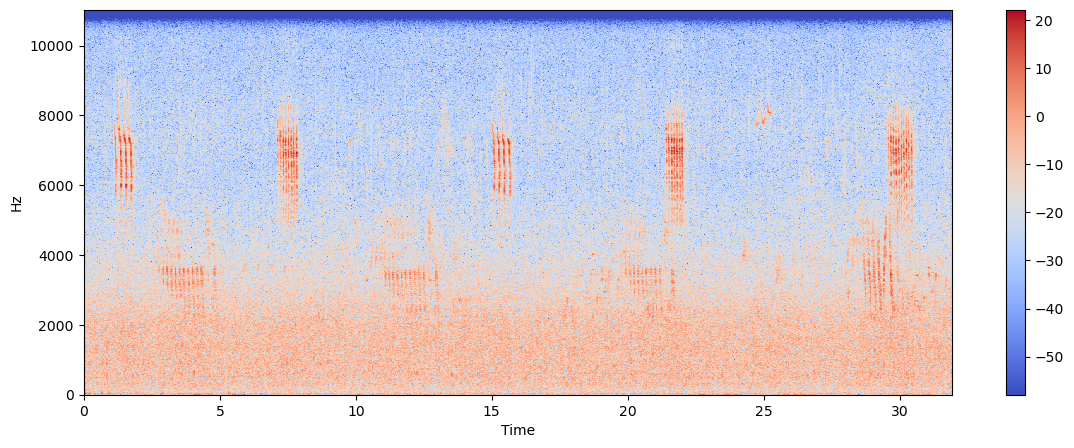

In [105]:
l=dat.value.tolist()
s=dat.Sr.tolist()
amp_db = librosa.amplitude_to_db(abs(librosa.stft(l[0])))
plt.figure(figsize=(14, 5))
librosa.display.specshow(amp_db, sr=s[0], x_axis='time', y_axis='hz')
plt.colorbar()

[2.7648639e-10 2.9103830e-11 7.2759576e-11 ... 5.4479986e-03 4.6347398e-03
 3.2307832e-03] 22050


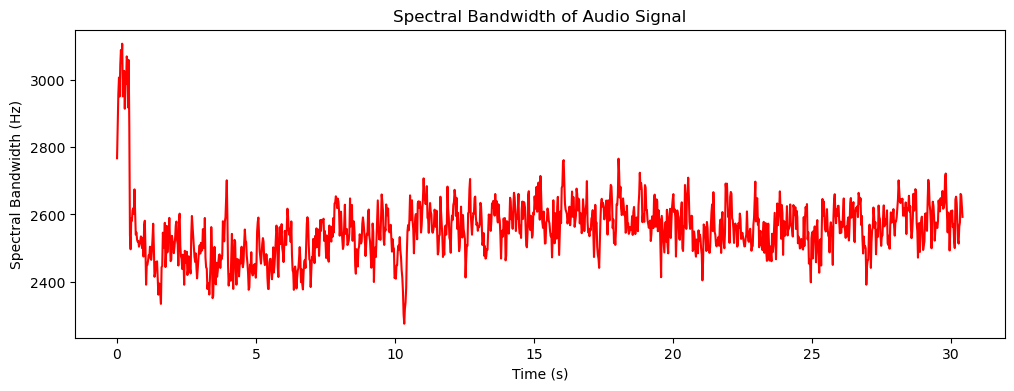

In [128]:
from sklearn import preprocessing
am,sam = librosa.load(r'/Users/Divya/ALLBIRDScopy/Bent-Beak-Riffraff-86.wav')
print(am,sam)
spec_b = librosa.feature.spectral_bandwidth(y=am,sr=sam)
# librosa.display.waveshow(am, sr=sam, alpha=0.4)
# plt.plot(t, normalize([spec_b]))
frames = range(len(spec_b[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plot the spectral bandwidth
plt.figure(figsize=(12, 4))
plt.plot(t, spec_b[0], color='r')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Bandwidth (Hz)')
plt.title('Spectral Bandwidth of Audio Signal')
plt.show()

34


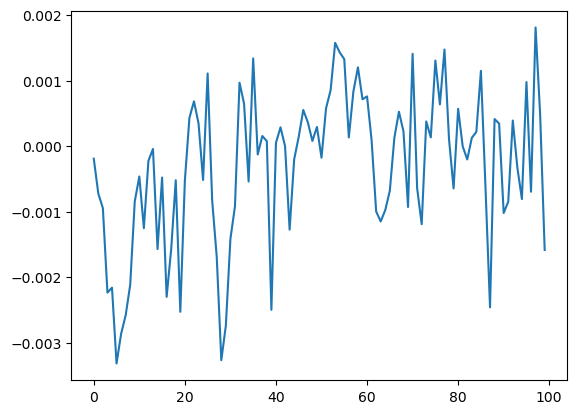

In [132]:
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(am[n0:n1], pad=False)
print(sum(zero_crossings))
plt.plot(am[n0:n1])

In [54]:
print(len(d['ID']),len(d['Sr']),len(d['value']),len(d['Name']))

KeyError: 'Name'

In [55]:
dat['ID']=[i.split('(')[0] for i in dat.ID]

In [56]:
dat.dtypes

ID       object
Sr        int64
value    object
dtype: object

In [57]:
# d=d.astype({'ID': 'int64'}).dtypes
dat['ID'] = dat['ID'].apply(pd.to_numeric)

In [58]:
dat.dtypes

ID        int64
Sr        int64
value    object
dtype: object

In [59]:
df

,ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,label
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,13,1
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76,1
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,12,1
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,12,1
5,401720,Rose-crested Blue Pipit,call,A,13:00,12/28/2016,132,12,1
...,...,...,...,...,...,...,...,...,...
2075,305167,Vermillion Trillian,call,D,16:30,2/28/2016,56,87,0
2076,305166,Vermillion Trillian,call,D,16:00,2/28/2016,86,14,0
2077,236287,Vermillion Trillian,song,D,17:10,4/12/2015,72,58,0
2078,236286,Vermillion Trillian,song,D,17:05,4/12/2015,40,10,0


In [60]:
df.dtypes

ID                    int64
English_name         object
Vocalization_type    object
Quality              object
Time                 object
Date                 object
X                     int64
Y                     int64
label                 int64
dtype: object

In [61]:
data_final = pd.merge(dat, df, on="ID")

In [62]:
data_final.English_name

0                    Queenscoat
1             Broad-winged Jojo
2            Orange Pine Plover
3            Orange Pine Plover
4            Bent-beak Riffraff
                 ...           
1800    Rose-crested Blue Pipit
1801                 Queenscoat
1802         Eastern Corn Skeet
1803             Ordinary Snape
1804          Broad-winged Jojo
Name: English_name, Length: 1805, dtype: object

In [63]:
import numpy as np
rmse,spec_bw, zcr = [], [], []
sr = 22050
for y in tqdm(data_final.value) :
    rmse.append(np.mean(librosa.feature.zero_crossing_rate(y=y)))
    spec_bw.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))
    zcr.append(np.mean(librosa.feature.zero_crossing_rate(y)))

100%|███████████████████████████████████████| 1805/1805 [03:25<00:00,  8.77it/s]


In [64]:
data_final['rms']=rmse
data_final['spec_bw']=spec_bw
data_final['zcr']=zcr


In [65]:
x=data_final[['rms','spec_bw','zcr']].values
y=data_final.label

In [66]:
len(x)

1805

In [67]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1800    1
1801    0
1802    0
1803    0
1804    0
Name: label, Length: 1805, dtype: int64

# Modelling

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=24)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cl = KNeighborsClassifier(n_neighbors=5)
cl.fit(X_train, y_train) 
pred = cl.predict(X_test)
cf = confusion_matrix(y_test, pred)
print(cf)
accu= accuracy_score(y_test,pred)
print(accu)

[[403   3]
 [ 46   0]]
0.8915929203539823


In [72]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
cf1 = confusion_matrix(y_test, predicted)
print(cf1)
acc = accuracy_score(y_test, predicted)
print(acc)

[[406   0]
 [ 46   0]]
0.8982300884955752


In [76]:
test_rms,test_spec_bw,test_zcr = [],[],[]
sr = 22050
f = r"/Users/Divya/Test_Birds_from_Kasios/"
for x in tqdm(listdir(r"/Users/Divya/Test_Birds_from_Kasios/")) :
    y, sr = librosa.load(f+x)
    test_rms.append(np.mean(librosa.feature.rms(y=y)))
    test_spec_bw.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))
    test_zcr.append(np.mean(librosa.feature.zero_crossing_rate(y)))

100%|███████████████████████████████████████████| 15/15 [00:03<00:00,  4.83it/s]


In [77]:
t=pd.DataFrame({'rms':test_rms,'spec_bw':test_spec_bw,'zcr':test_zcr})

In [78]:
t

,rms,spec_bw,zcr
0,0.016461,2393.539834,0.398144
1,0.010893,2521.357065,0.233048
2,0.016921,2202.894066,0.159863
3,0.043647,1661.060277,0.472818
4,0.006805,3182.588511,0.304452
5,0.017298,1784.783699,0.092516
6,0.007988,2085.332778,0.274664
7,0.005473,1919.747498,0.264246
8,0.010347,3138.525646,0.224001
9,0.050587,901.848280,0.161742


In [79]:
cl.predict(t)
# test["Labels"] = model.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
svc.predict(t)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])